In [2]:
##file loading

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np


fits_image_filename = 'jw02107-c1019_t018_miri_f1000w_i2d.fits'

# Open the FITS file

hdul = fits.open(fits_image_filename)

hdul.info()

Filename: jw02107-c1019_t018_miri_f1000w_i2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     354   ()      
  1  SCI           1 ImageHDU        75   (5648, 2092)   float32   
  2  ERR           1 ImageHDU        10   (5648, 2092)   float32   
  3  CON           1 ImageHDU        10   (5648, 2092, 1)   int32   
  4  WHT           1 ImageHDU         9   (5648, 2092)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (5648, 2092)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (5648, 2092)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (5648, 2092)   float32   
  8  HDRTAB        1 BinTableHDU    828   20R x 409C   [23A, 5A, 3A, 49A, 7A, 13A, 6A, 7A, 6A, 7A, 10A, 4A, L, D, D, D, D, 32A, 51A, 70A, 11A, 2A, D, 47A, D, 10A, 12A, 23A, 23A, 26A, 11A, 5A, 3A, 3A, 2A, 1A, 2A, 1A, L, 14A, 13A, 2A, 26A, 20A, 27A, 10A, K, L, L, L, L, 7A, 7A, 5A, D, D, D, D, D, D, 27A, D, D, D, 4A, 8A, D, D, 6A, D, D, D, D, D, D, D, 4A, D, D

In [3]:
## data load

scidata = hdul['SCI'].data
#print(scidata)

#size of pixel in degrees 0.11 arcseconds per pixel
print(hdul['SCI'].header['CDELT1'])
print(hdul['SCI'])


3.08130462514196e-05


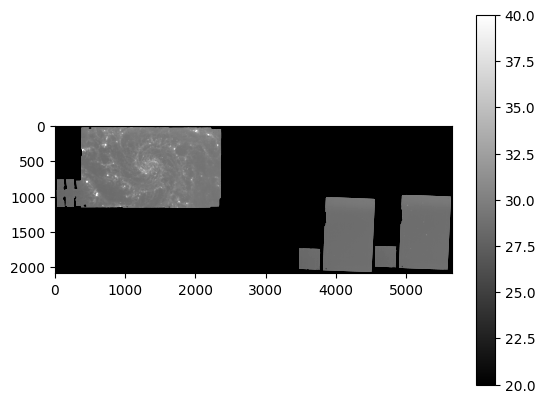

In [4]:
## image load

image_data = hdul['SCI'].data

# then to plot
plt.figure()
plt.imshow(image_data, cmap='gray',vmin=20,vmax=40)
plt.colorbar()

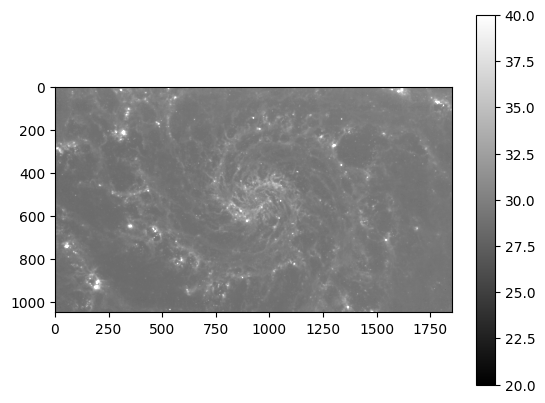

In [5]:
## cropping

from astropy.convolution import convolve, convolve_fft, Gaussian2DKernel
from scipy.ndimage import convolve as scipy_convolve

# Scale the file to have reasonable numbers
# (this is mostly so that colorbars do not have too many digits)
# Also, we crop it so you can see individual pixels
img = image_data[50:1100, 400:2250]
plt.figure()
plt.imshow(img, cmap='gray',vmin=20,vmax=40)
plt.colorbar()

In [7]:
## define kernels

# It is a 9x9 array

kernel8 = Gaussian2DKernel(x_stddev=8)
# kernel10 = Gaussian2DKernel(x_stddev=10)
# kernel30 = Gaussian2DKernel(x_stddev=30)
kernel24 = Gaussian2DKernel(x_stddev=24)
#kernel72 = Gaussian2DKernel(x_stddev=72)


astropy_conv8 = convolve(img, kernel8)
# astropy_conv10 = convolve(img, kernel10)
# astropy_conv30 = convolve(img, kernel30)
astropy_conv24 = convolve(img, kernel24)
#astropy_conv72 = convolve(img, kernel72)

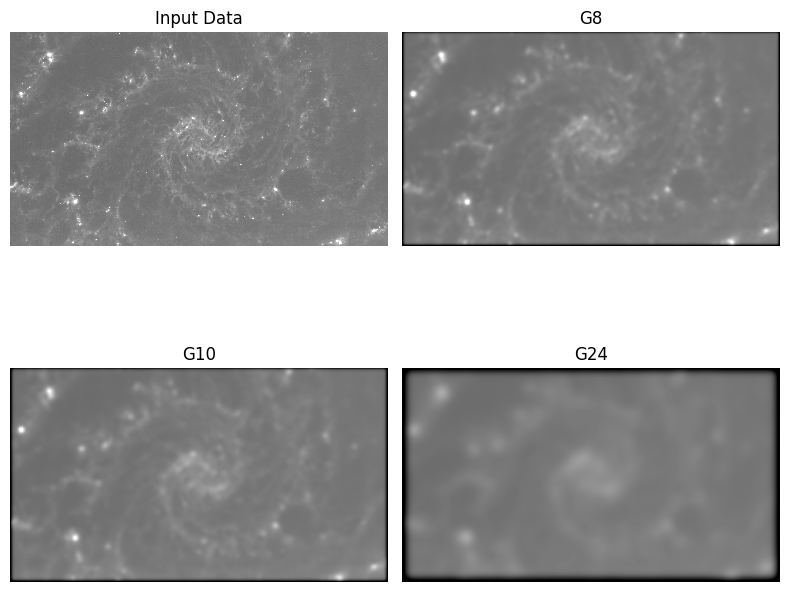

In [13]:
## display images

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95,
                    wspace=0.3, hspace=0.3)
ax = ax.flatten()
for axis in ax:
    axis.axis('off')
    
im = ax[0].imshow(img, vmin=20, vmax=40.0, origin='lower',
                  interpolation='nearest', cmap='gray')
y, x = np.where(np.isnan(img))
ax[0].plot(x, y, 'rx', markersize=4)
# nan_coordinates = np.where(np.isnan(img))
# y, x = nan_coordinates
ax[0].set_title("Input Data")
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])


im = ax[1].imshow(astropy_conv8, vmin=20, vmax=40.0, origin='lower',
                  interpolation='nearest', cmap='gray')
ax[1].set_title("G8")
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

im = ax[2].imshow(astropy_conv10, vmin=20, vmax=40.0, origin='lower',
                  interpolation='nearest', cmap='gray')
ax[2].set_title("G10")
ax[2].set_xticklabels([])
ax[2].set_yticklabels([])

im = ax[3].imshow(astropy_conv24, vmin=20, vmax=40.0, origin='lower',
                  interpolation='nearest', cmap='gray')
ax[3].set_title("G24")
ax[3].set_xticklabels([])
ax[3].set_yticklabels([])


plt.tight_layout()
plt.show()

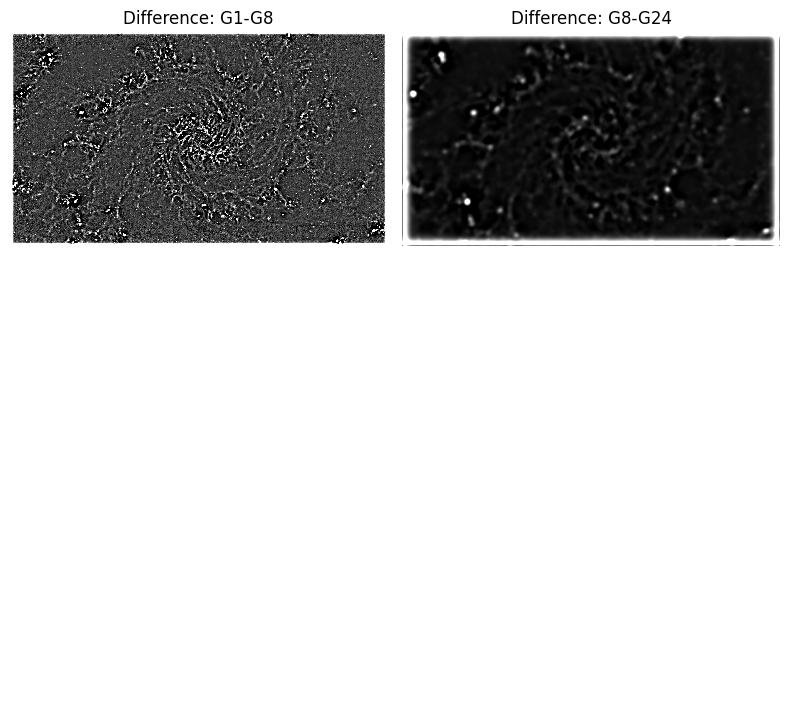

In [8]:
## subtracted images

import matplotlib.pyplot as plt

# first image

diff1 = img - astropy_conv8

#print(diff1)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95,
                    wspace=0.3, hspace=0.3)
ax = ax.flatten()
for axis in ax:
    axis.axis('off')

pct1 = np.percentile(diff1, [5, 95])
# vmin = pct1[0]
# vmax = pct1[1]

im = ax[0].imshow(diff1, vmin=pct1[0], 
                  vmax=pct1[1], origin='lower',
                  interpolation='nearest', cmap='gray')
ax[0].set_title("Difference: G1-G8")
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])

# second image

diff2 = astropy_conv8 - astropy_conv24

#print(diff2)

pct2 = np.percentile(diff2, [5, 95])

im = ax[1].imshow(diff2, vmin=pct2[0], vmax=pct2[1], origin='lower',
                  interpolation='nearest', cmap='gray')
ax[1].set_title("Difference: G8-G24")
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

# third image


# diff3 = astropy_conv10 - astropy_conv30

# #print(diff3)

# pct3 = np.percentile(diff3, [5, 95])

# im = ax[2].imshow(diff3, vmin=pct3[0], vmax=pct3[1], origin='lower',
#                   interpolation='nearest', cmap='gray')
# ax[2].set_title("Difference: G10-G30")
# ax[2].set_xticklabels([])
# ax[2].set_yticklabels([])

# # fourth image

# diff4 = astropy_conv24 - astropy_conv72

# #print(diff4)

# pct4 = np.percentile(diff4, [5, 95])

# im = ax[3].imshow(diff4, vmin=pct4[0], vmax=pct4[1], origin='lower',
#                   interpolation='nearest', cmap='gray')
# ax[3].set_title("Difference: G24-G72")
# ax[3].set_xticklabels([])
# ax[3].set_yticklabels([])


plt.tight_layout()
plt.show()





In [45]:
## other images 

kernel15 = Gaussian2DKernel(x_stddev=15)
kernel45 = Gaussian2DKernel(x_stddev=45)

astropy_conv15 = convolve(img, kernel15)
astropy_conv45 = convolve(img, kernel45)

diff5 = astropy_conv15 - astropy_conv45

#print(diff5)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95,
                    wspace=0.3, hspace=0.3)
ax = ax.flatten()
for axis in ax:
    axis.axis('off')

pct5 = np.percentile(diff5, [5, 95])


im = ax[0].imshow(diff5, vmin=pct5[0], 
                  vmax=pct5[1], origin='lower',
                  interpolation='nearest', cmap='gray')
ax[0].set_title("Difference: conv_15 - conv_45")
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])

im = ax[1].imshow(astropy_conv15, vmin=20, vmax=40.0, origin='lower',
                  interpolation='nearest', cmap='gray')
ax[1].set_title("conv_15")
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

im = ax[2].imshow(astropy_conv45, vmin=20, vmax=40.0, origin='lower',
                  interpolation='nearest', cmap='gray')
ax[2].set_title("conv_45")
ax[2].set_xticklabels([])
ax[2].set_yticklabels([])

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [9]:
## last set of kernels 

kernel1 = Gaussian2DKernel(x_stddev=1)
kernel3 = Gaussian2DKernel(x_stddev=3)
kernel2 = Gaussian2DKernel(x_stddev=2)
kernel6 = Gaussian2DKernel(x_stddev=6)
kernel4 = Gaussian2DKernel(x_stddev=4)
kernel12 = Gaussian2DKernel(x_stddev=12)
kernel16 = Gaussian2DKernel(x_stddev=16)
kernel48 = Gaussian2DKernel(x_stddev=48)
# kernel32 = Gaussian2DKernel(x_stddev=32)
# kernel96 = Gaussian2DKernel(x_stddev=96)


astropy_conv1 = convolve(img, kernel1)
astropy_conv3 = convolve(img, kernel3)
astropy_conv2 = convolve(img, kernel2)
astropy_conv6 = convolve(img, kernel6)
astropy_conv4 = convolve(img, kernel4)
astropy_conv12 = convolve(img, kernel12)
astropy_conv16 = convolve(img, kernel16)
astropy_conv48 = convolve(img, kernel48)
# astropy_conv32 = convolve(img, kernel32)
# astropy_conv96 = convolve(img, kernel96)

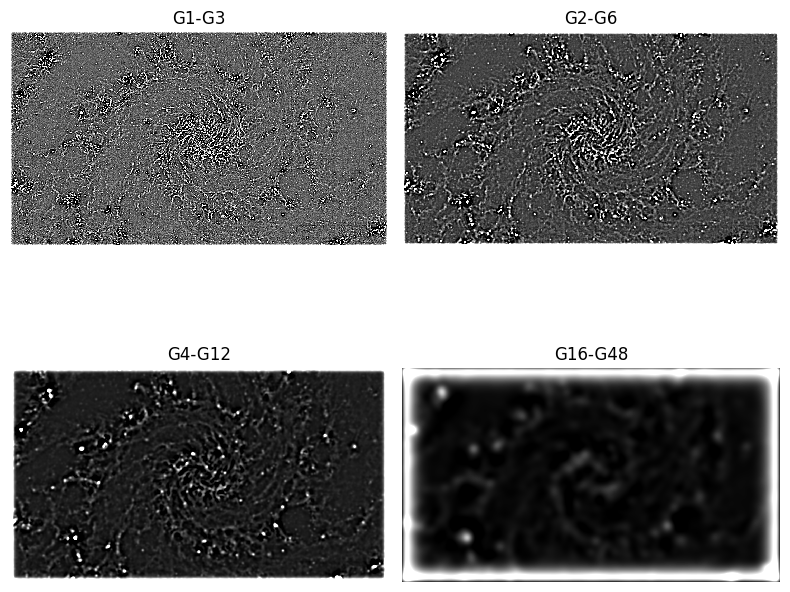

In [10]:
## last plots (second)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95,
                    wspace=0.3, hspace=0.3)
ax = ax.flatten()
for axis in ax:
    axis.axis('off')

diff6 = astropy_conv1 - astropy_conv3

pct6 = np.percentile(diff6, [5, 95])


im = ax[0].imshow(diff6, vmin=pct6[0], 
                  vmax=pct6[1], origin='lower',
                  interpolation='nearest', cmap='gray')
ax[0].set_title("G1-G3")
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])

diff7 = astropy_conv2 - astropy_conv6

pct7 = np.percentile(diff7, [5, 95])


im = ax[1].imshow(diff7, vmin=pct7[0], 
                  vmax=pct7[1], origin='lower',
                  interpolation='nearest', cmap='gray')
ax[1].set_title("G2-G6")
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])

diff8 = astropy_conv4 - astropy_conv12

pct8 = np.percentile(diff8, [5, 95])


im = ax[2].imshow(diff8, vmin=pct8[0], 
                  vmax=pct8[1], origin='lower',
                  interpolation='nearest', cmap='gray')
ax[2].set_title("G4-G12")
ax[2].set_xticklabels([])
ax[2].set_yticklabels([])

diff9 = astropy_conv16 - astropy_conv48

pct9 = np.percentile(diff9, [5, 95])


im = ax[3].imshow(diff9, vmin=pct9[0], 
                  vmax=pct9[1], origin='lower',
                  interpolation='nearest', cmap='gray')
ax[3].set_title("G16-G48")
ax[3].set_xticklabels([])
ax[3].set_yticklabels([])

plt.tight_layout()
plt.show()

In [11]:
## finding the galaxy's center

from photutils.centroids import (centroid_1dg, centroid_2dg,
                                 centroid_com, centroid_quadratic)
from mpl_toolkits.axes_grid1.inset_locator import (mark_inset,
                                                   zoomed_inset_axes)

x0, y0 = centroid_com(img)
print('Original: ' + str((x0, y0)))

x1, y1 = centroid_com(diff1)
x2, y2 = centroid_com(diff2)
# x3, y3 = centroid_com(diff3)
# x4, y4 = centroid_com(diff4)


print('Difference: Input - conv_8: ' + str((x1, y1)))
print('Difference: conv_8 - conv_24: ' + str((x2, y2)))
# print('Difference: conv_10 - conv_30: ' + str((x3, y3)))
# print('Difference: conv_24 - conv_72: ' + str((x4, y4)))

Original: (926.5103190490624, 522.5668207786902)
Difference: Input - conv_8: (929.0930006612074, 518.2223618837819)
Difference: conv_8 - conv_24: (929.2378579035997, 516.8866930348571)


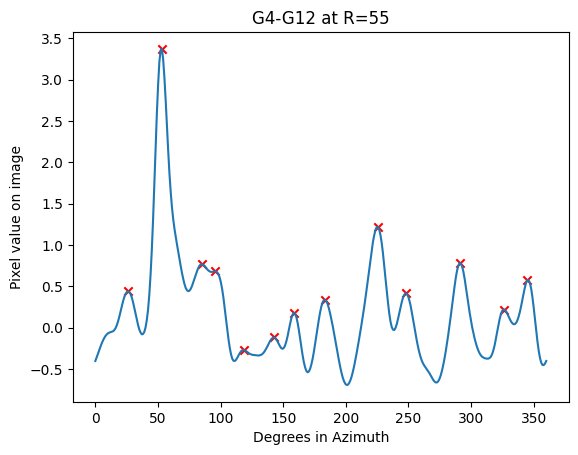

In [12]:
## testing for diff8


from skimage.draw import disk
from scipy.ndimage import map_coordinates
from scipy.signal import find_peaks

center_x, center_y = x1, y1
radius = 55 #count by arcsecond, each pixel step corresponds to 1 arcsecond
num_samples = 360

# calculate azimuthal coordinates, generating circles
theta = np.linspace(0, 2*np.pi, num_samples)

# convert polar coordinates to Cartesian coordinates
x_coords = center_x + radius * np.cos(theta)
y_coords = center_y + radius * np.sin(theta)


azimuthal_values = map_coordinates(diff8, [y_coords, x_coords], order=1)
#print (azimuthal_values)

peaks, _ = find_peaks(azimuthal_values)


plt.plot(np.degrees(theta), azimuthal_values)
plt.scatter(np.degrees(theta[peaks]), azimuthal_values[peaks], color='red', marker='x', label='Local Maxima')
plt.xlabel("Degrees in Azimuth") #angle around the circle
plt.ylabel("Pixel value on image")
plt.title("G4-G12 at R=55")
plt.show()


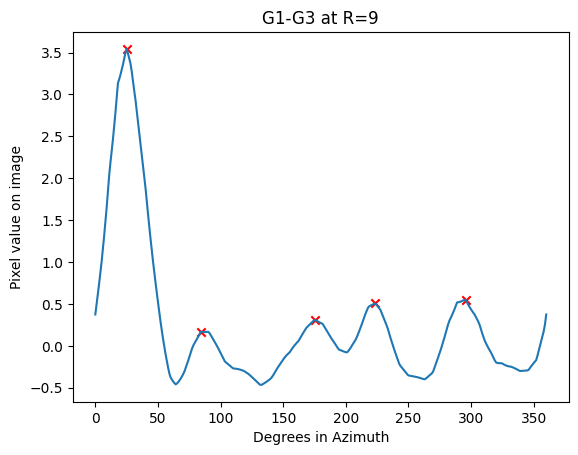

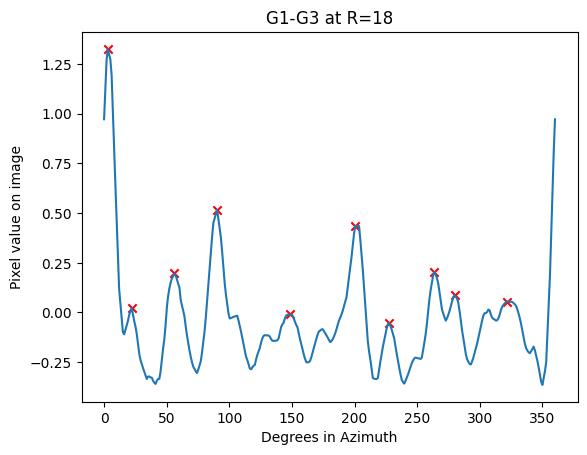

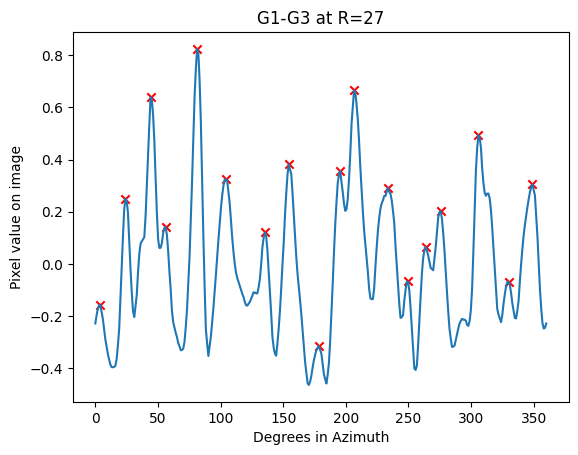

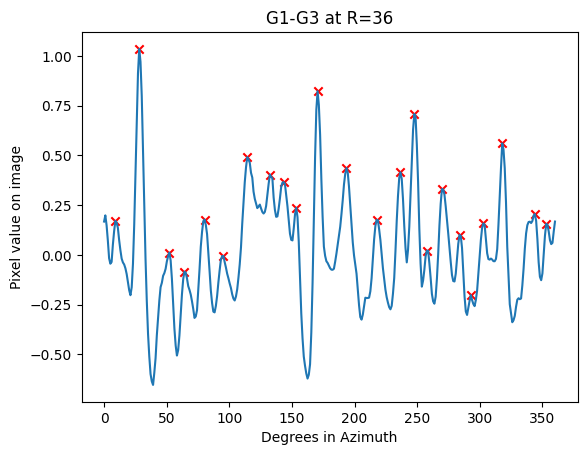

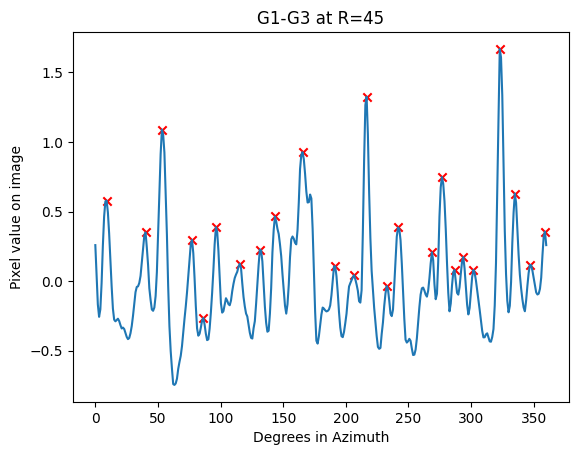

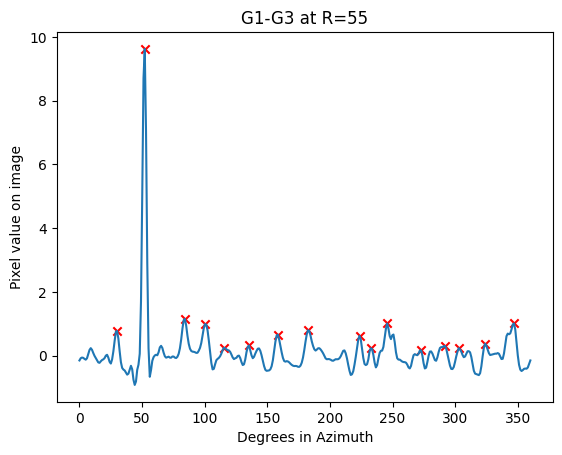

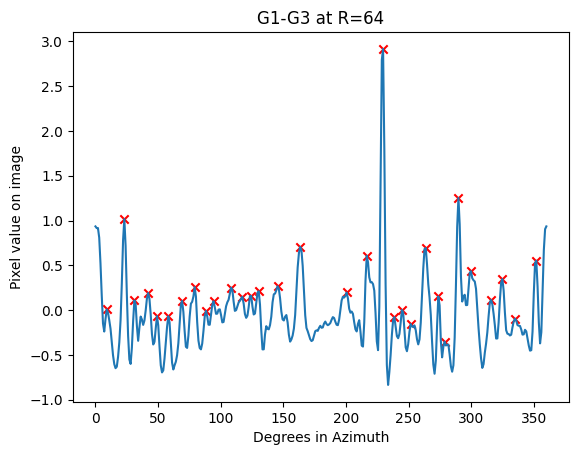

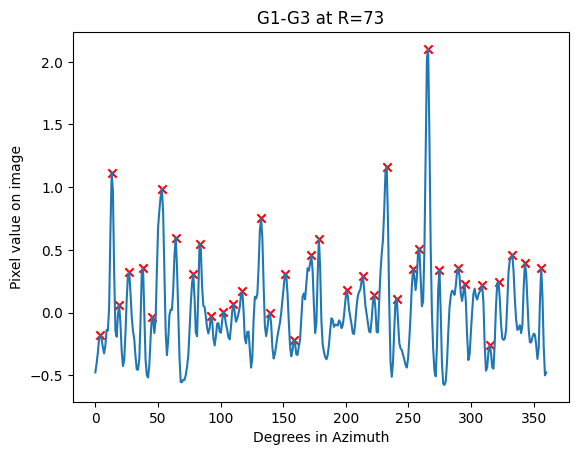

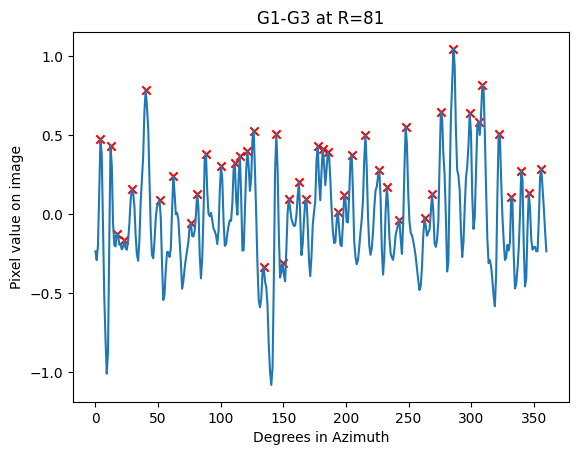

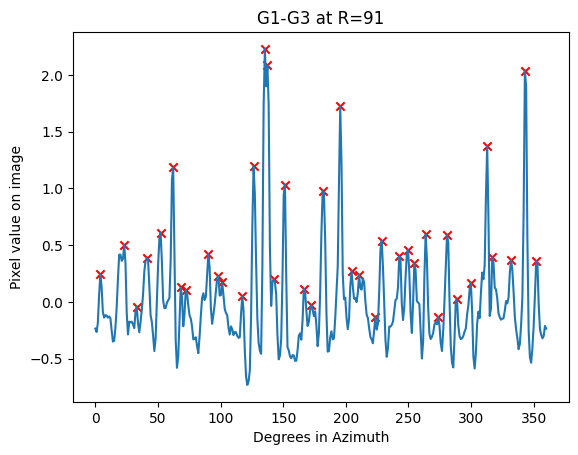

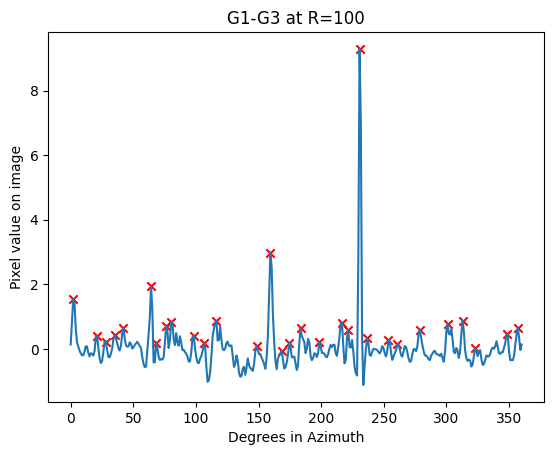

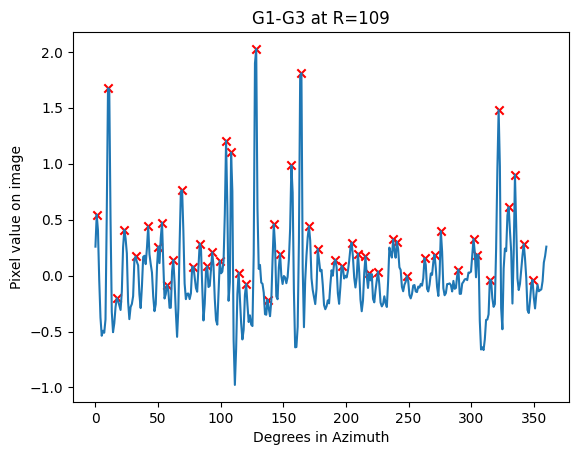

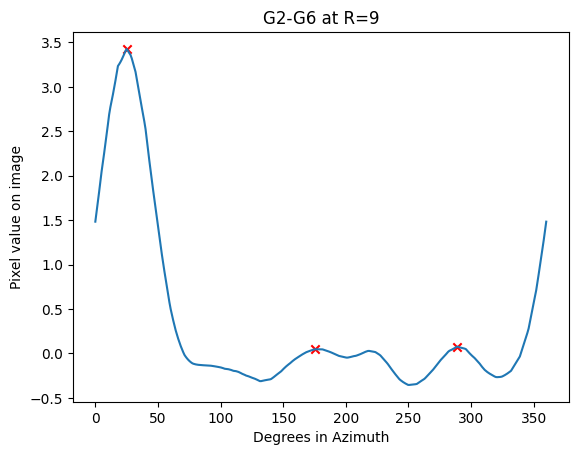

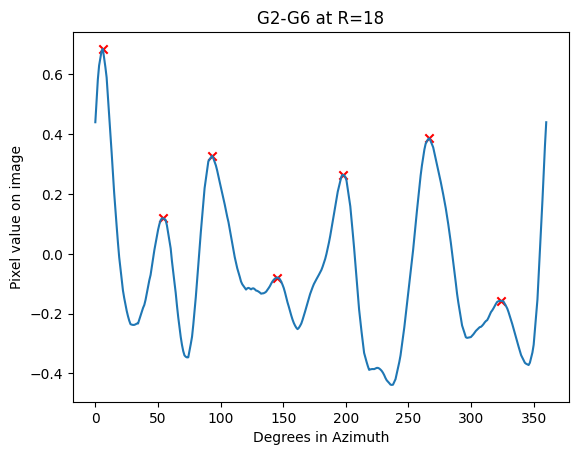

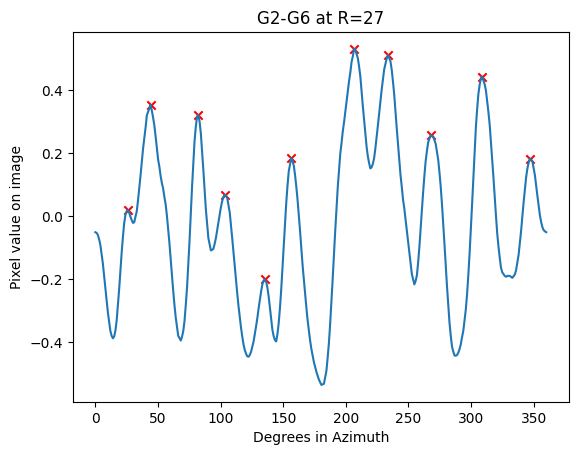

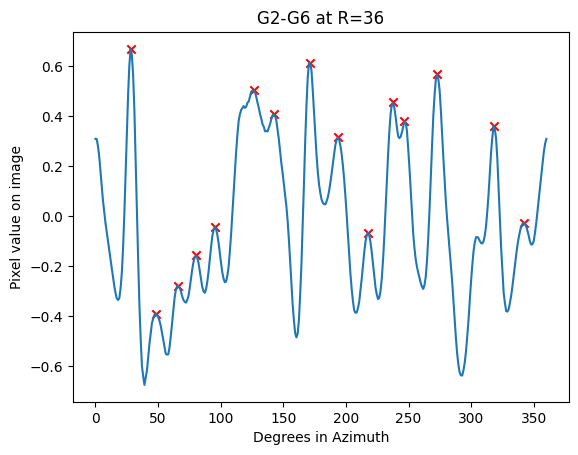

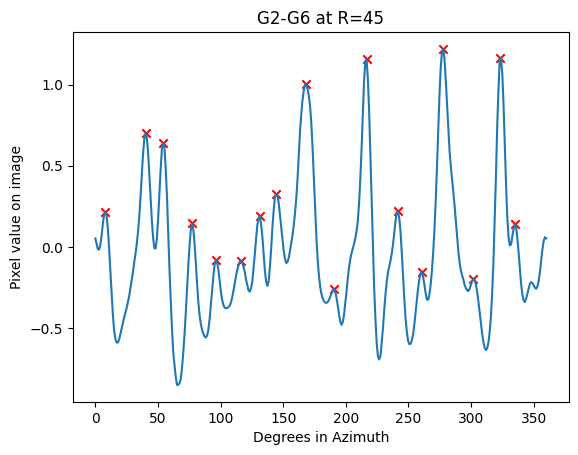

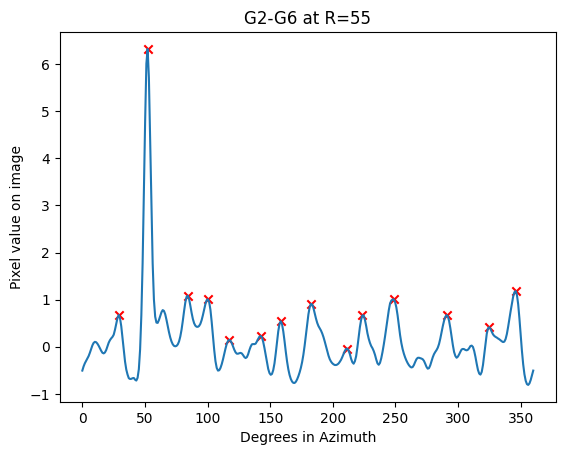

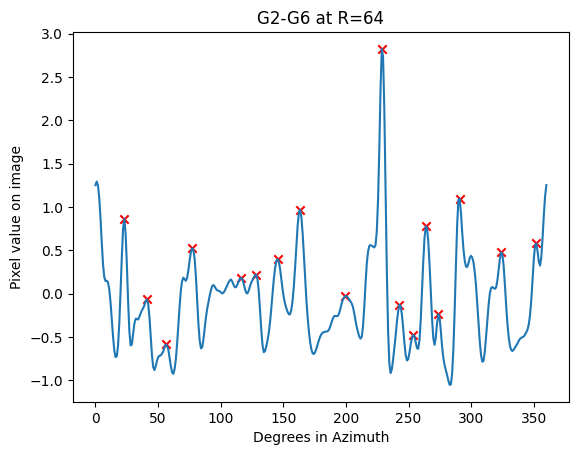

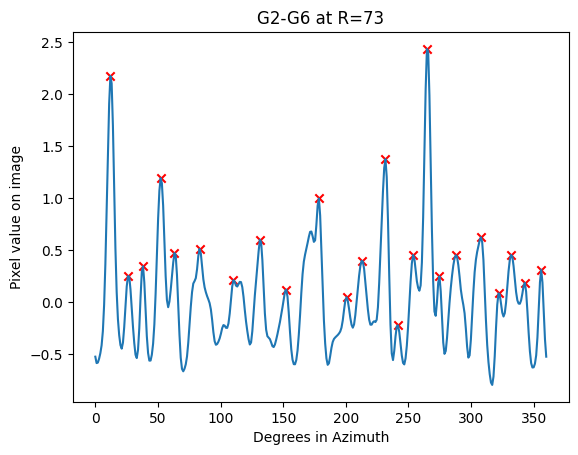

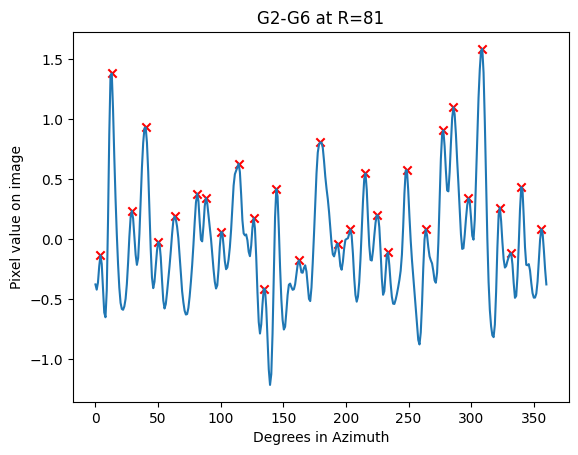

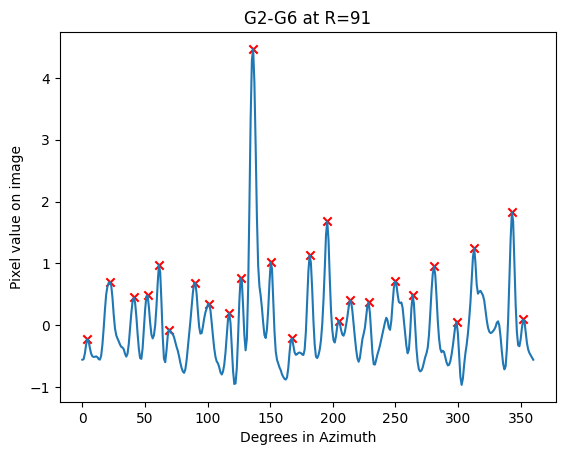

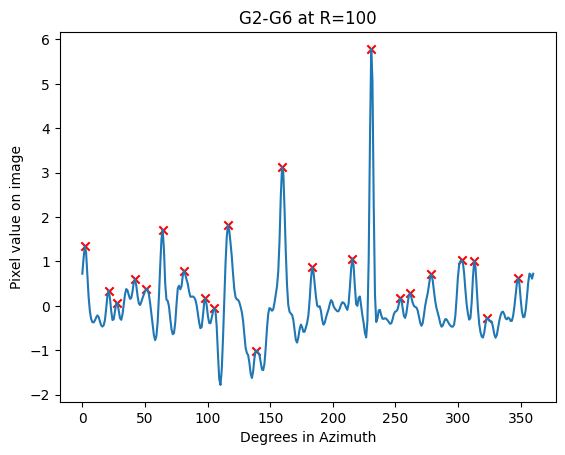

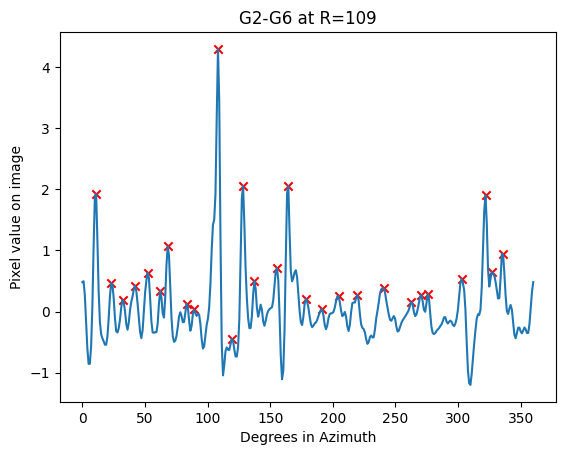

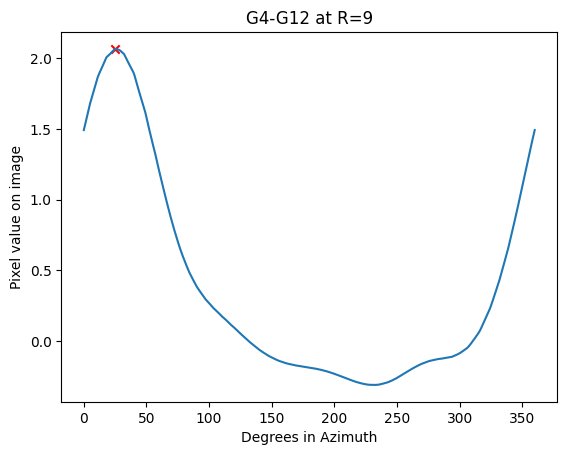

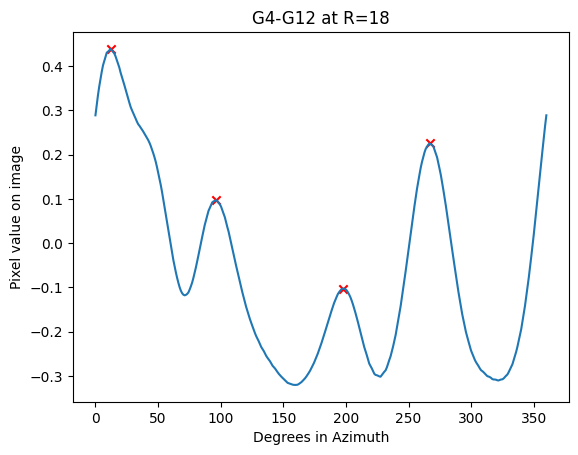

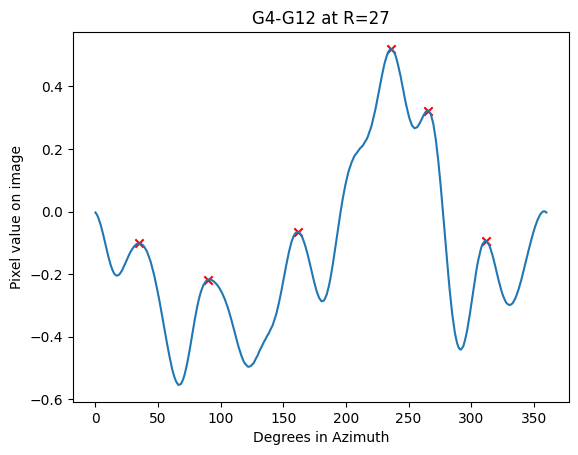

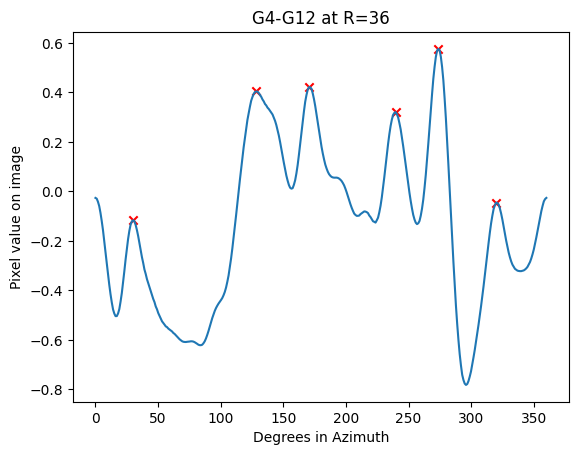

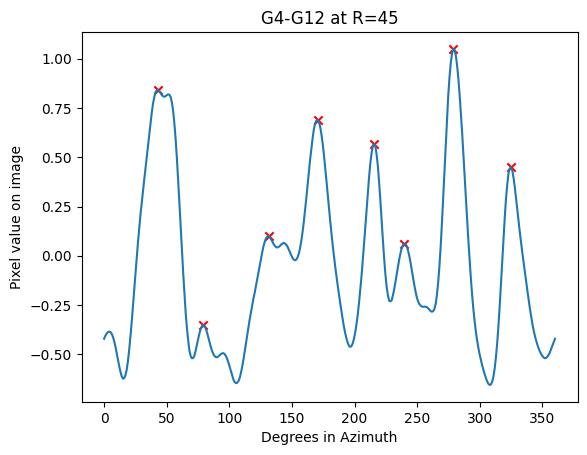

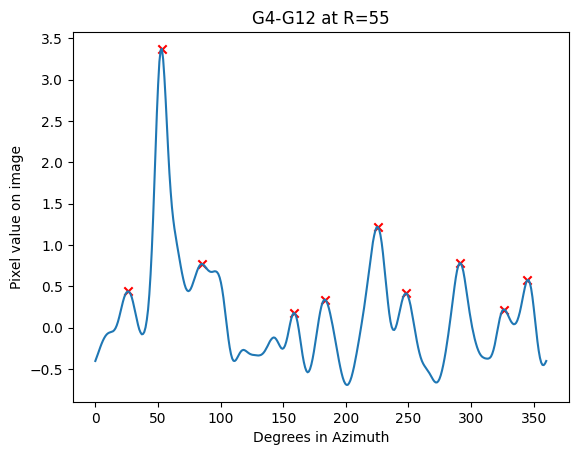

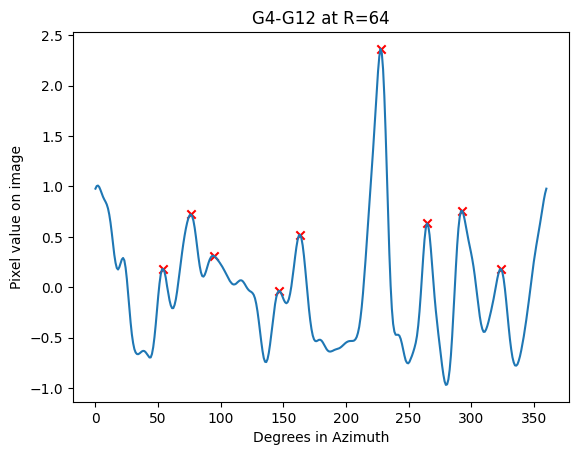

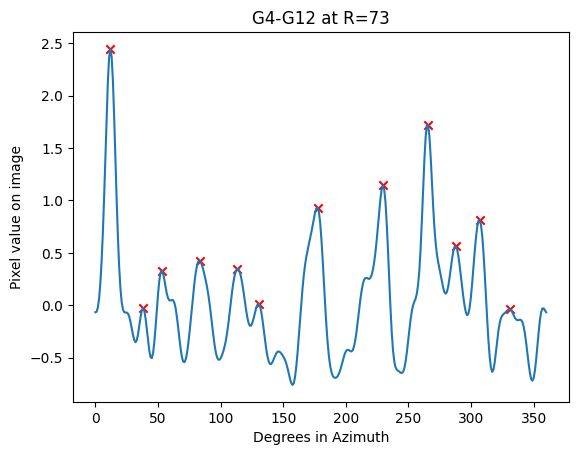

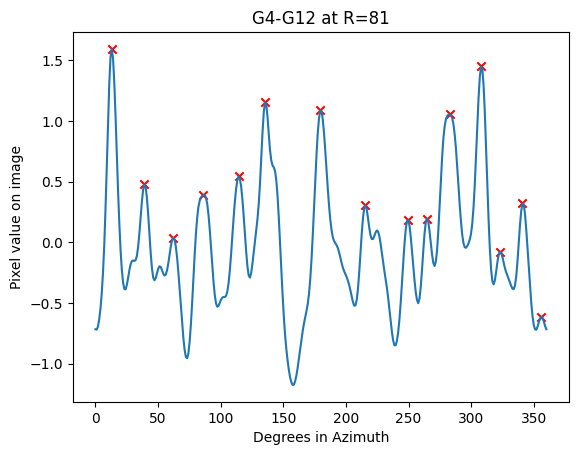

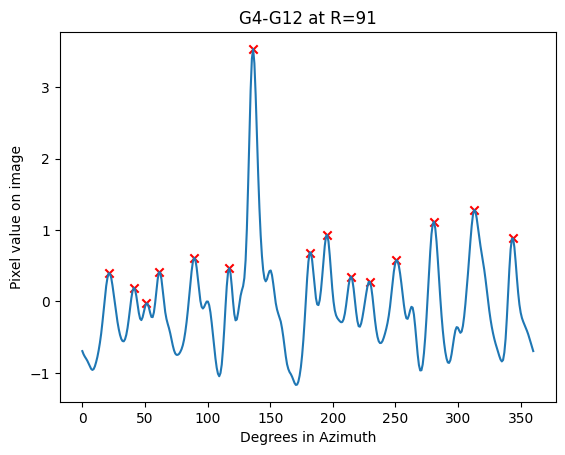

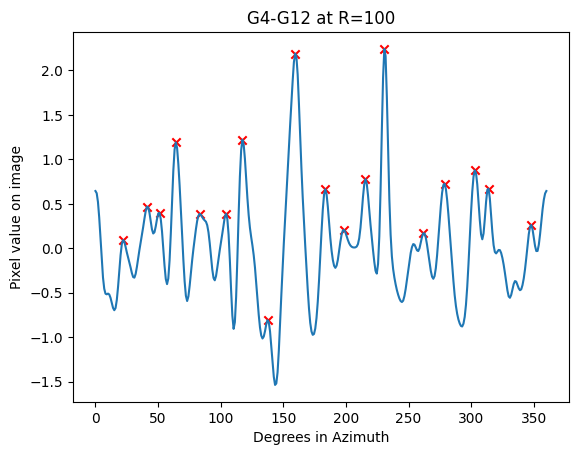

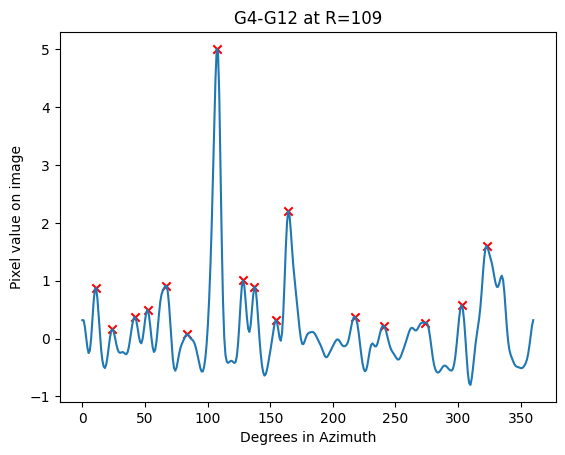

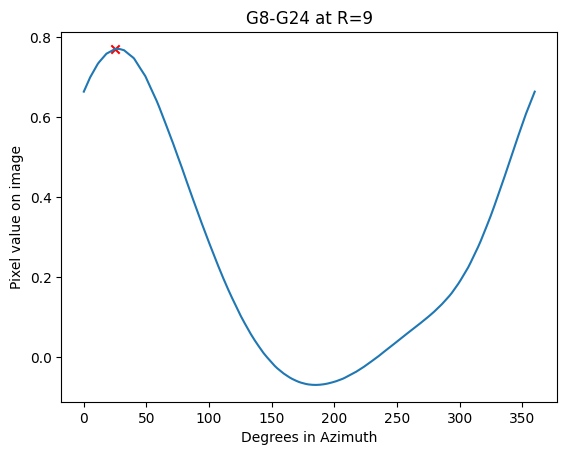

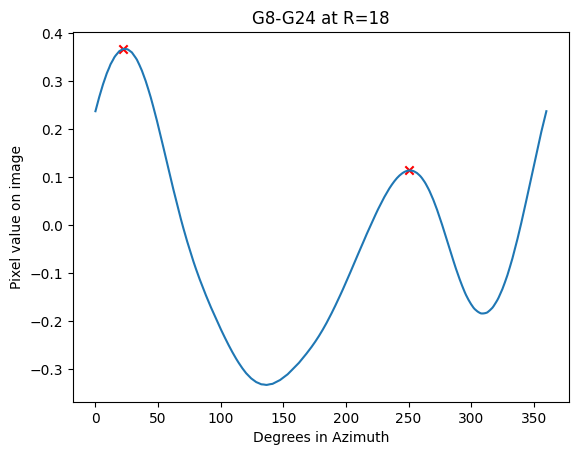

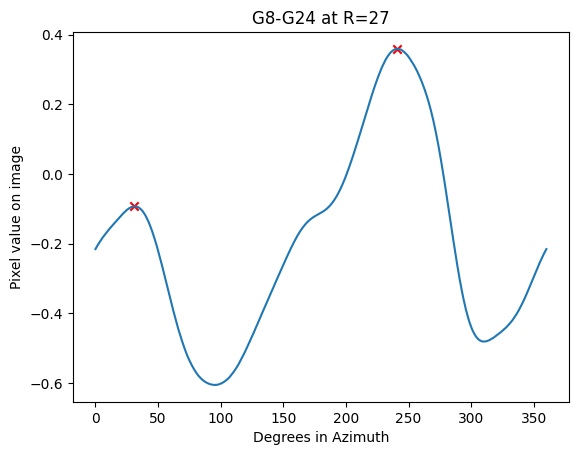

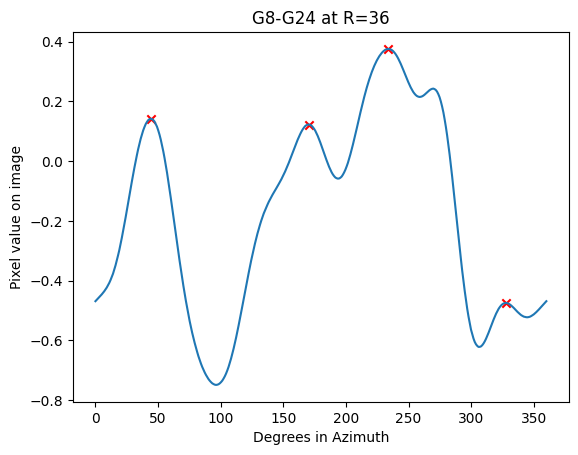

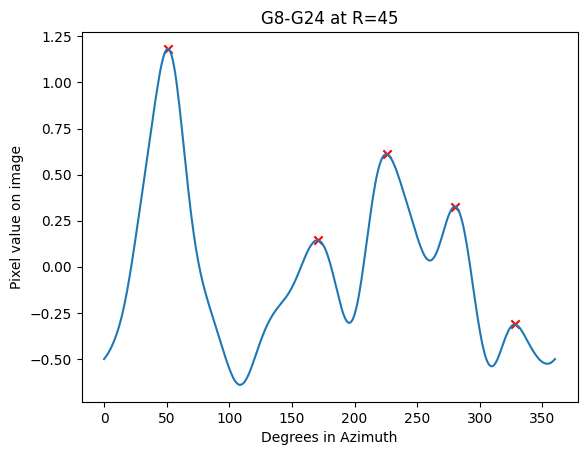

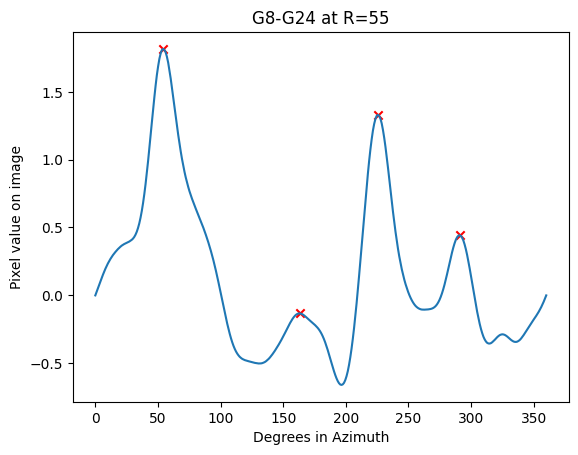

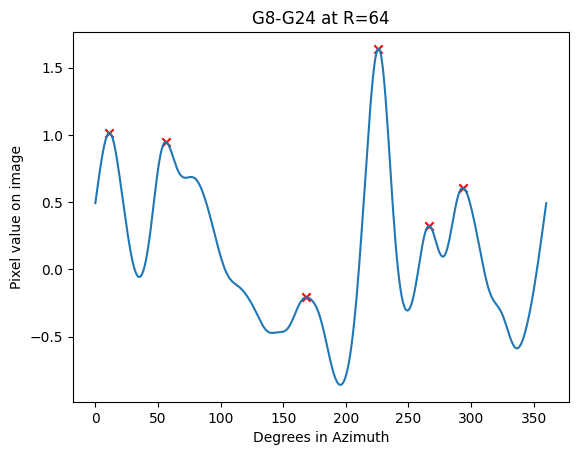

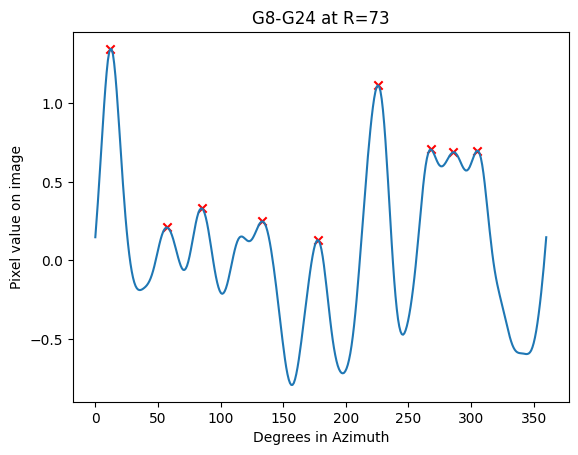

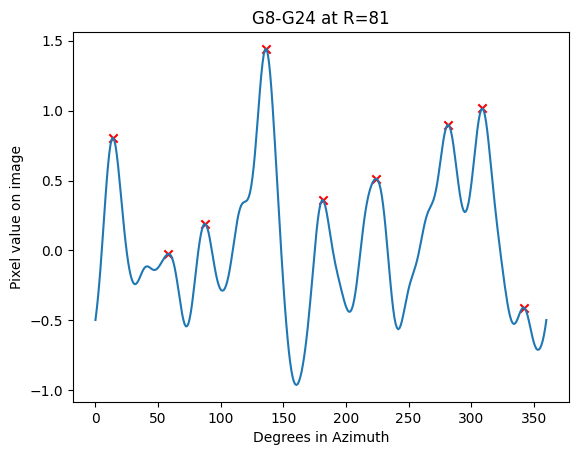

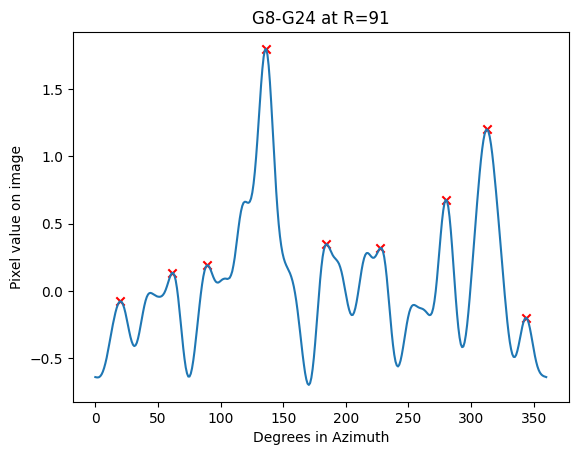

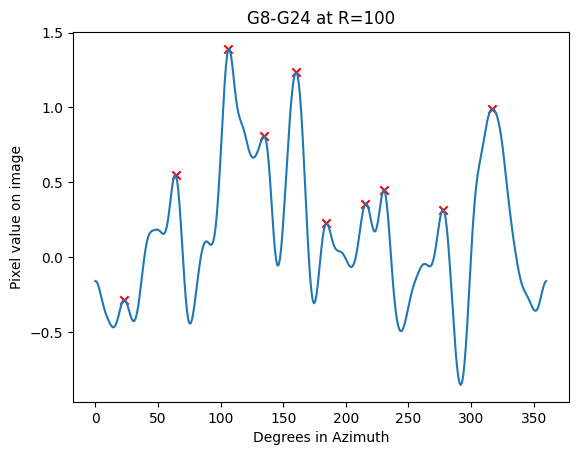

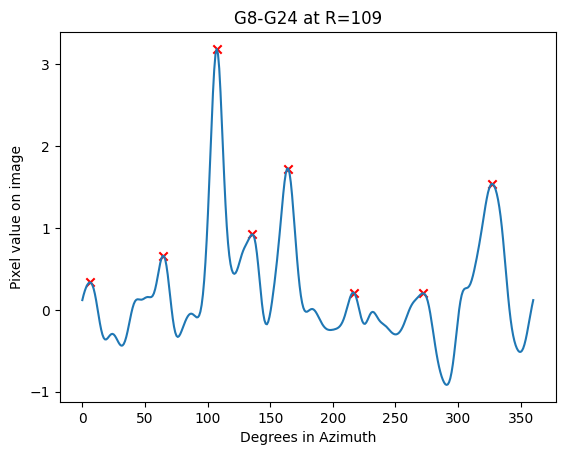

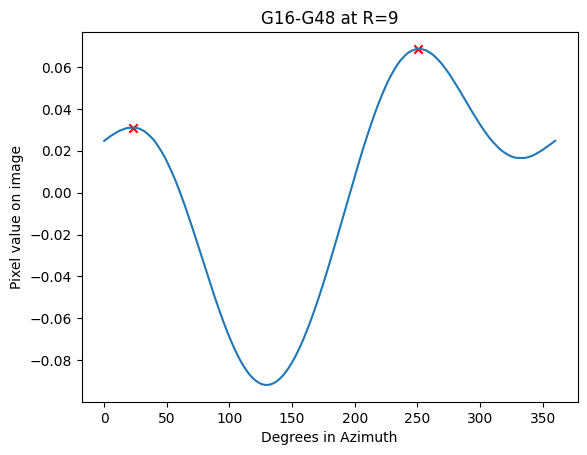

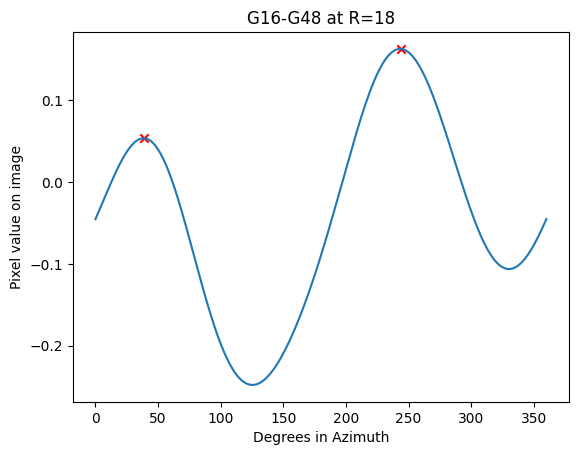

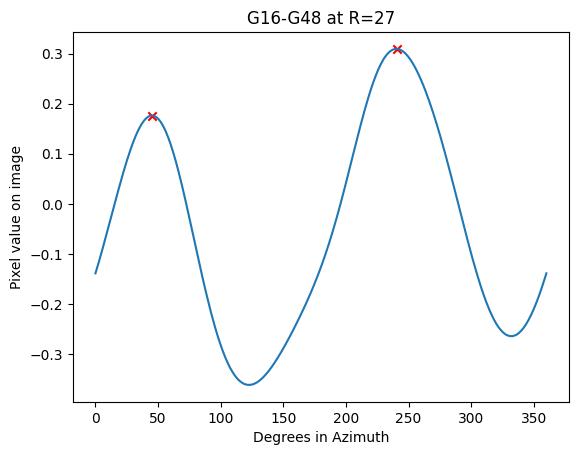

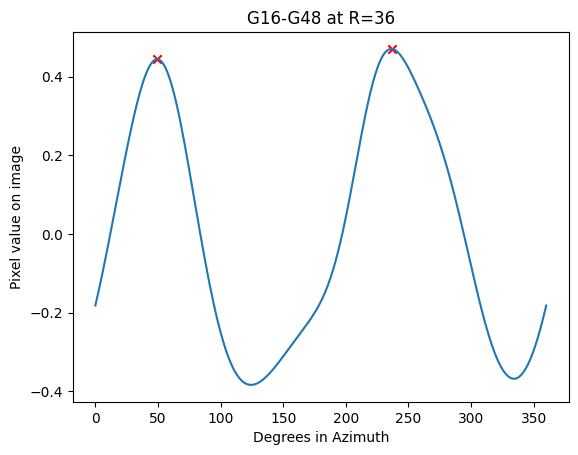

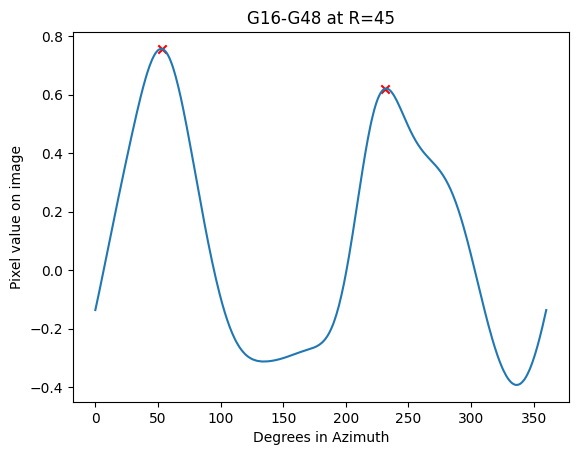

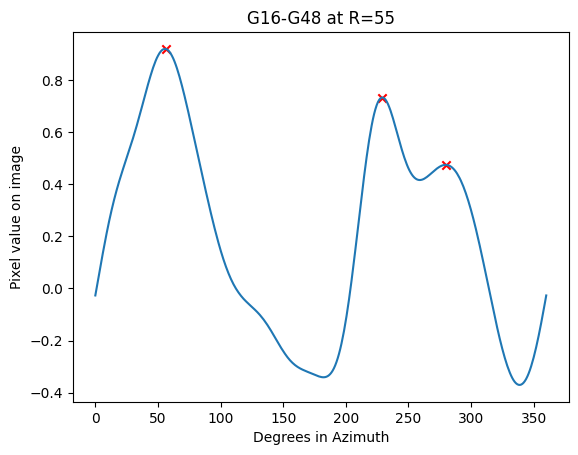

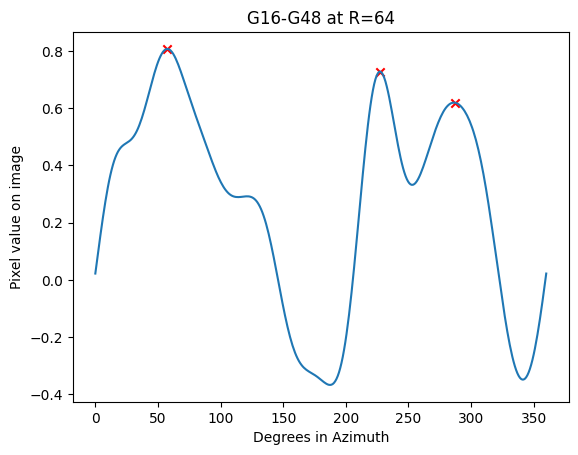

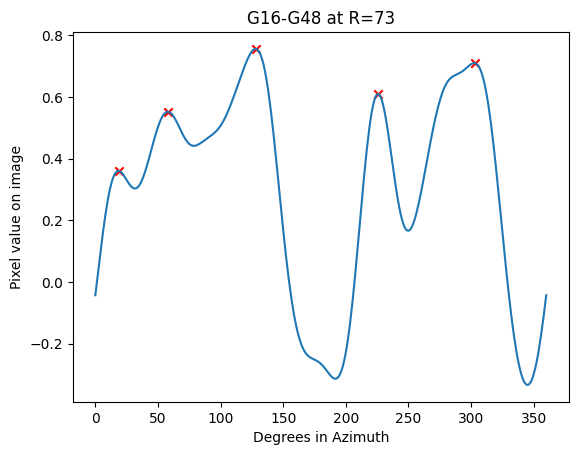

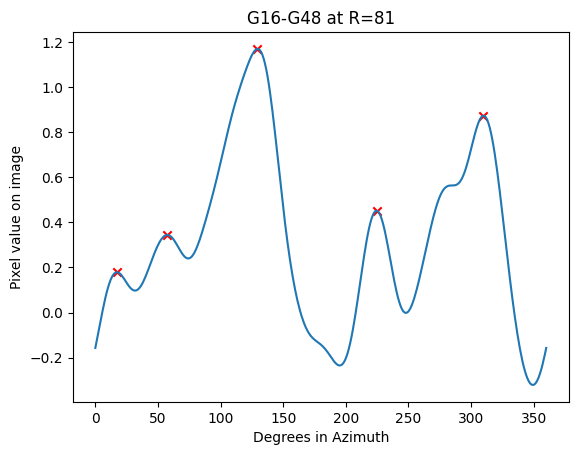

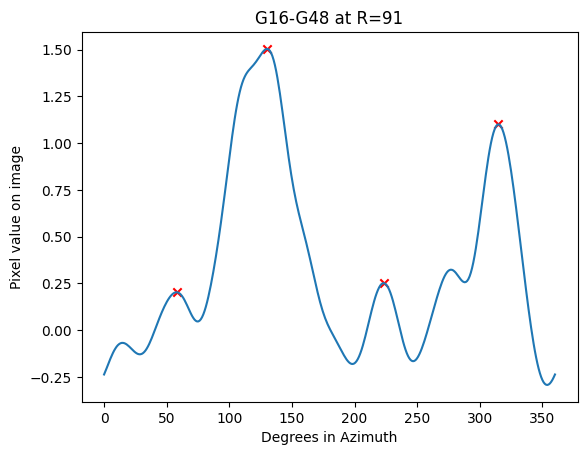

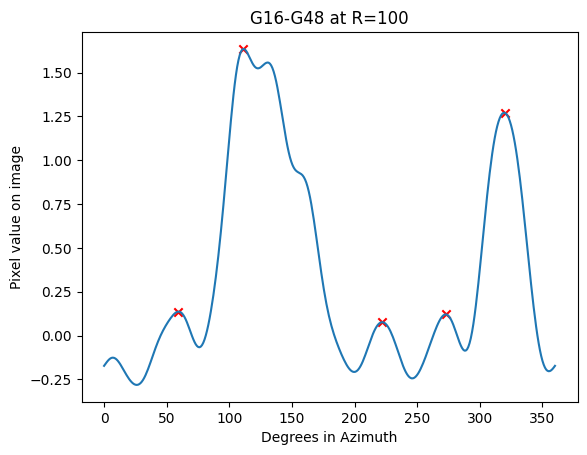

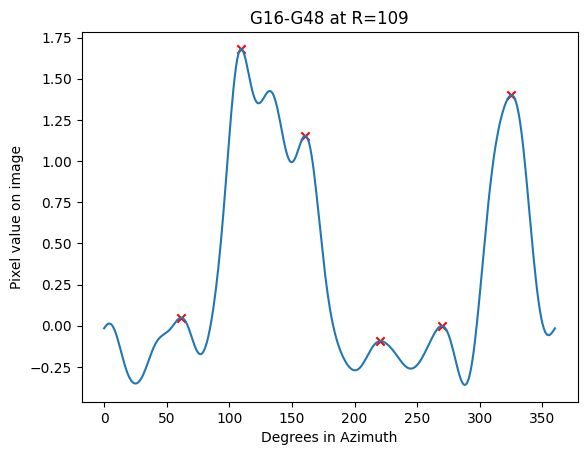

In [37]:
## generate all plots 

from skimage.draw import disk
from scipy.ndimage import map_coordinates
from scipy.signal import find_peaks

# Define radii values
radii_values = [9, 18, 27, 36, 45, 55, 64, 73, 81, 91, 100, 109]

# Define corresponding labels
diff_labels = ["G1-G3", "G2-G6", "G4-G12", "G8-G24", "G16-G48"]

threshold_percentage = 5

# Iterate through images (diff1 to diff4)
for diff_idx, diff_image in enumerate([diff6, diff7, diff8, diff2, diff9]):
    # Iterate through radii values
    for radius in radii_values:
        # Create a new figure for each combination of diff and radius
        plt.figure()

        # Calculate azimuthal coordinates
        theta = np.linspace(0, 2*np.pi, num_samples)
        x_coords = center_x + radius * np.cos(theta)
        y_coords = center_y + radius * np.sin(theta)

        # Extract azimuthal values using map_coordinates
        azimuthal_values = map_coordinates(diff_image, [y_coords, x_coords], order=1)

        # Find local maxima
        #peaks, _ = find_peaks(azimuthal_values)

        #peaks, _ = find_peaks(azimuthal_values, prominence=prominence_threshold)

        # Calculate dynamic threshold
        dynamic_threshold = threshold_percentage * np.max(np.abs(azimuthal_values)) / 100

        # Find local maxima with dynamic threshold
        peaks, _ = find_peaks(azimuthal_values, prominence=dynamic_threshold)

        # Plot azimuthal values
        plt.plot(np.degrees(theta), azimuthal_values, label=f'R={radius}')

        # Scatter plot for local maxima
        plt.scatter(np.degrees(theta[peaks]), azimuthal_values[peaks], color='red', marker='x')

        # Set labels and title
        plt.xlabel("Degrees in Azimuth")
        plt.ylabel("Pixel value on image")
        plt.title(f"{diff_labels[diff_idx]} at R={radius}")
        #plt.legend()

        # Show the plot for the current combination of diff and radius
        plt.show()


In [26]:
# Generate LaTeX code for all 60 figures

import os 

# File path to save images
image_path = r"C:\\Users\\upoma\\Desktop\\Thesis\\Azimuthal Scans"

latex_code = ""
for diff_idx, diff_image in enumerate([diff6, diff7, diff8, diff2, diff9]):
    # Iterate through radii values
    for radius in radii_values:
        # Create a new figure for each combination of diff and radius
        plt.figure()

        # Calculate azimuthal coordinates
        theta = np.linspace(0, 2*np.pi, num_samples)
        x_coords = center_x + radius * np.cos(theta)
        y_coords = center_y + radius * np.sin(theta)

        # Extract azimuthal values using map_coordinates
        azimuthal_values = map_coordinates(diff_image, [y_coords, x_coords], order=1)

        # Find local maxima with dynamic threshold
        peaks, _ = find_peaks(azimuthal_values, prominence=dynamic_threshold)

        # Plot azimuthal values
        plt.plot(np.degrees(theta), azimuthal_values, label=f'R={radius}')

        # Scatter plot for local maxima
        plt.scatter(np.degrees(theta[peaks]), azimuthal_values[peaks], color='red', marker='x')

        # Set labels and title
        plt.xlabel("Degrees in Azimuth")
        plt.ylabel("Pixel Value")
        plt.title(f"{diff_labels[diff_idx]} at R={radius}")
        #plt.legend()

       # Save the plot for the current combination of diff and radius
        g_label = ["G1-G3", "G2-G6", "G4-G12", "G8-G24", "G16-G48"][diff_idx]
        filename = f"{g_label.lower()}-r{radius}.png"
        filepath = os.path.join(image_path, filename)
        plt.savefig(filepath)

        # Close the current figure
        plt.close()

        # Generate LaTeX code for the saved figure
        latex_code += f"\\begin{{figure}}\n"
        latex_code += f"    \\centering\n"
        latex_code += f"    \\includegraphics[width=0.7\\textwidth]{{thesistemplate_2020-04-24/Azimuthal/{filename}}}\n"
        latex_code += f"    \\caption{{Azimuthal scan at radius of {radius} pixels for {diff_labels[diff_idx]} image.}}\n"
        latex_code += f"    \\label{{fig:{diff_labels[diff_idx].lower()}-r{radius}}}\n"
        latex_code += f"\\end{{figure}}\n\n"

# Print or save the generated LaTeX code
print(latex_code)

\begin{figure}
    \centering
    \includegraphics[width=0.7\textwidth]{thesistemplate_2020-04-24/Azimuthal/g1-g3-r9.png}
    \caption{Azimuthal scan at radius of 9 pixels for G1-G3 image.}
    \label{fig:g1-g3-r9}
\end{figure}

\begin{figure}
    \centering
    \includegraphics[width=0.7\textwidth]{thesistemplate_2020-04-24/Azimuthal/g1-g3-r18.png}
    \caption{Azimuthal scan at radius of 18 pixels for G1-G3 image.}
    \label{fig:g1-g3-r18}
\end{figure}

\begin{figure}
    \centering
    \includegraphics[width=0.7\textwidth]{thesistemplate_2020-04-24/Azimuthal/g1-g3-r27.png}
    \caption{Azimuthal scan at radius of 27 pixels for G1-G3 image.}
    \label{fig:g1-g3-r27}
\end{figure}

\begin{figure}
    \centering
    \includegraphics[width=0.7\textwidth]{thesistemplate_2020-04-24/Azimuthal/g1-g3-r36.png}
    \caption{Azimuthal scan at radius of 36 pixels for G1-G3 image.}
    \label{fig:g1-g3-r36}
\end{figure}

\begin{figure}
    \centering
    \includegraphics[width=0.7\textwidth]{the

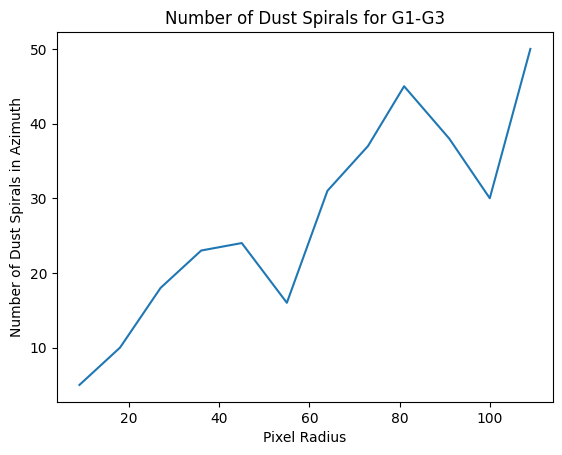

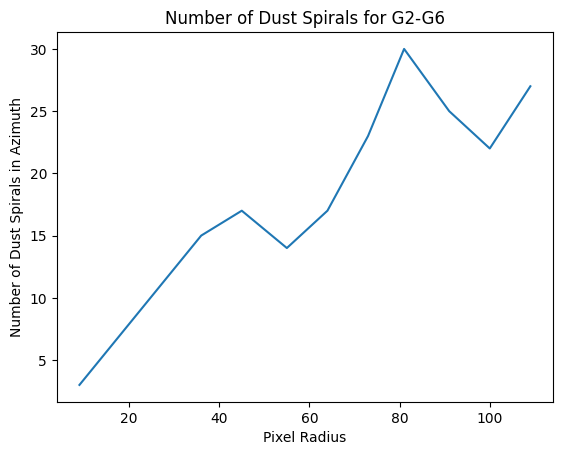

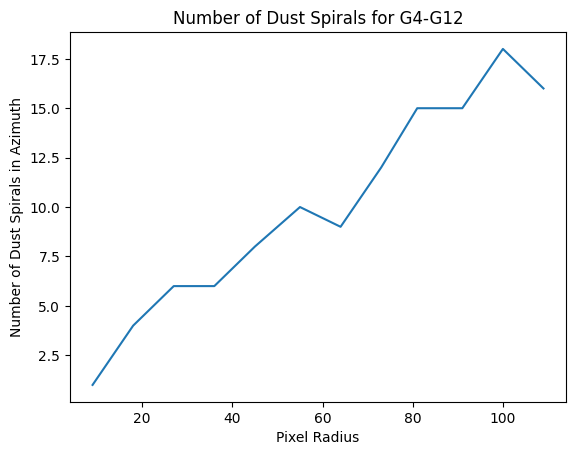

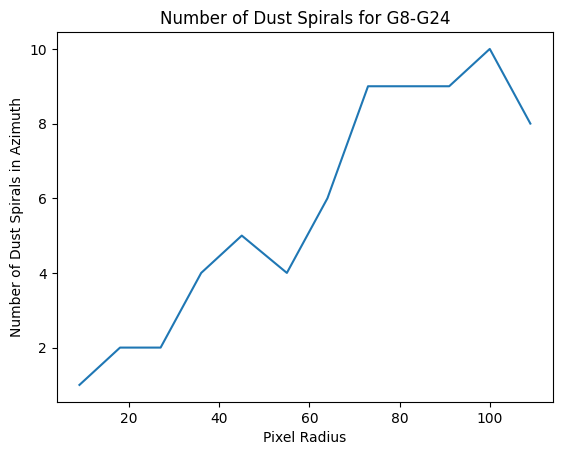

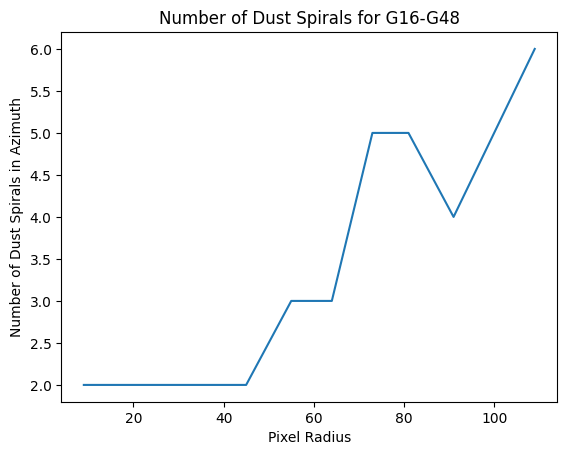

In [54]:
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates
from scipy.signal import find_peaks

# Define radii values
radii_values = [9, 18, 27, 36, 45, 55, 64, 73, 81, 91, 100, 109]

# Define corresponding labels
diff_labels = ["G1-G3", "G2-G6", "G4-G12", "G8-G24", "G16-G48"]

threshold_percentage = 5

# Iterate through images (diff1 to diff4)
for diff_idx, diff_image in enumerate([diff6, diff7, diff8, diff2, diff9]):
    # Lists to store results for the current image difference
    radius_values = []
    num_spirals = []
    
    # Iterate through radii values
    for radius in radii_values:
        # Calculate azimuthal coordinates
        theta = np.linspace(0, 2*np.pi, num_samples)
        x_coords = center_x + radius * np.cos(theta)
        y_coords = center_y + radius * np.sin(theta)

        # Extract azimuthal values using map_coordinates
        azimuthal_values = map_coordinates(diff_image, [y_coords, x_coords], order=1)

        # Calculate dynamic threshold
        dynamic_threshold = threshold_percentage * np.max(np.abs(azimuthal_values)) / 100

        # Find local maxima with dynamic threshold
        peaks, _ = find_peaks(azimuthal_values, prominence=dynamic_threshold)

        # Append results to current image difference lists
        radius_values.append(radius)
        num_spirals.append(len(peaks))

    # Plotting for the current image difference
    plt.figure()
    plt.plot(radius_values, num_spirals)
    plt.xlabel("Pixel Radius")
    plt.ylabel("Number of Dust Spirals in Azimuth")
    plt.title(f"Number of Dust Spirals for {diff_labels[diff_idx]}")
    plt.show()


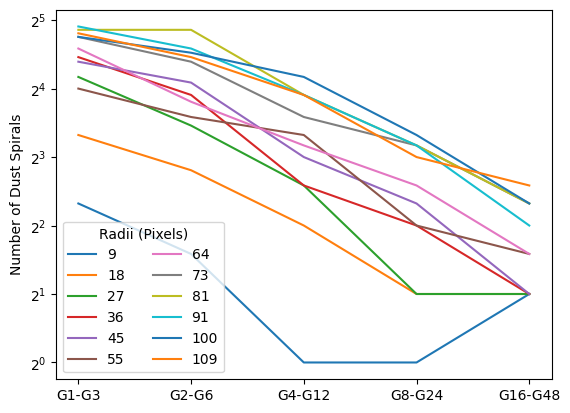

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import map_coordinates
from scipy.signal import find_peaks

# Define radii values
radii_values = [9, 18, 27, 36, 45, 55, 64, 73, 81, 91, 100, 109]

# Define corresponding labels
diff_labels = ["G1-G3", "G2-G6", "G4-G12", "G8-G24", "G16-G48"]

threshold_percentage = 5
num_samples = 100

# Create a dictionary to store data for the log plot
log_data = {"G1-G3": [], "G2-G6": [], "G4-G12": [], "G8-G24": [], "G16-G48" : []}

# Iterate through radii values
for radius in radii_values:
    # Lists to store results for the current radius
    num_spirals = []

    # Iterate through images 
    for diff_idx, diff_image in enumerate([diff6, diff7, diff8, diff2, diff9]):
        # Calculate azimuthal coordinates
        theta = np.linspace(0, 2*np.pi, num_samples)
        x_coords = center_x + radius * np.cos(theta)
        y_coords = center_y + radius * np.sin(theta)

        # Extract azimuthal values using map_coordinates
        azimuthal_values = map_coordinates(diff_image, [y_coords, x_coords], order=1)

        # Calculate dynamic threshold
        dynamic_threshold = threshold_percentage * np.max(np.abs(azimuthal_values)) / 100

        # Find local maxima with dynamic threshold
        peaks, _ = find_peaks(azimuthal_values, prominence=dynamic_threshold)

        # Append results to current radius list
        num_spirals.append(len(peaks))

    # Append data for the log plot
    log_data[f'R={radius}'] = [np.log2(num) for num in num_spirals]

# Create log plot
plt.figure()

for radius in radii_values:
    plt.plot(diff_labels, log_data[f'R={radius}'], label=f'{radius}')

#plt.xlabel("Image Difference")
plt.ylabel("Number of Dust Spirals")
#plt.title("Log Plot of Dust Spirals vs Image Difference for Different Radii")
plt.legend(title="Radii (Pixels)", ncol=2)

yticks = [2**i for i in range(6)] 
plt.yticks(np.log2(yticks), [fr'$2^{i}$' for i in range(6)])

plt.show()


In [56]:
## fractal dimension

from sklearn.linear_model import LinearRegression

# Create a list to store slopes for each radius
slopes = []
diff_labels = ["G1-G3", "G2-G6", "G4-G12", "G8-G24", "G16-G48"]

# Iterate through radii values
for radius in radii_values:
    x = np.arange(len(diff_labels)).reshape(-1, 1)
    y = log_data[f'R={radius}']

    # Fit a linear regression model
    model = LinearRegression().fit(x, y)

    # Get the slope (coefficient)
    slope = model.coef_[0]

    # Print the slope for the current radius
    print(f"Slope for R={radius}: {slope}")

    # Store the slope in the list
    slopes.append(slope)

# Convert the slopes list to a NumPy array
slopes = np.array(slopes)

# # Calculate the standard deviation of slopes
slope_std = np.std(slopes)
# Calculate the error on the mean
error_on_mean = slope_std / np.sqrt(len(radii_values))


# Calculate and print the average slope
average_slope = np.mean(slopes)
print(f"Average Slope: {average_slope} ± {error_on_mean}")


Slope for R=9: -0.422881869049588
Slope for R=18: -0.6451211111832328
Slope for R=27: -0.8799281621521922
Slope for R=36: -0.8825753832883113
Slope for R=45: -0.85501695919205
Slope for R=55: -0.6415037499278843
Slope for R=64: -0.7222392421336448
Slope for R=73: -0.608831123588866
Slope for R=81: -0.6760161794165679
Slope for R=91: -0.7228818690495883
Slope for R=100: -0.6067552675721863
Slope for R=109: -0.5904216461310193
Average Slope: -0.6878477135570943 ± 0.037435235225283726


In [58]:
## fractal dimension

from sklearn.linear_model import LinearRegression
radii_values = [9, 18, 27, 36, 45, 55, 64, 73, 81, 91, 100, 109]
diff_labels = ["G1-G3", "G2-G6", "G4-G12", "G8-G24", "G16-G48"]


# Create a list to store slopes for each radius
slopes = []

# Iterate through radii values
for radius in radii_values:
    if radius != 9:  # Exclude R=9
        x = np.arange(len(diff_labels)).reshape(-1, 1)
        y = log_data[f'R={radius}']

        # Fit a linear regression model
        model = LinearRegression().fit(x, y)

        # Get the slope (coefficient)
        slope = model.coef_[0]

        # Print the slope for the current radius
        print(f"Slope for R={radius}: {slope}")

        # Store the slope in the list
        slopes.append(slope)

# Convert the slopes list to a NumPy array
slopes = np.array(slopes)

# Calculate the standard deviation of slopes
slope_std = np.std(slopes)
rror_on_mean = slope_std / np.sqrt(len(radii_values))

# Calculate and print the average slope
average_slope = np.mean(slopes)
print(f"Average Slope: {average_slope} ± {error_on_mean}")


Slope for R=18: -0.6451211111832328
Slope for R=27: -0.8799281621521922
Slope for R=36: -0.8825753832883113
Slope for R=45: -0.85501695919205
Slope for R=55: -0.6415037499278843
Slope for R=64: -0.7222392421336448
Slope for R=73: -0.608831123588866
Slope for R=81: -0.6760161794165679
Slope for R=91: -0.7228818690495883
Slope for R=100: -0.6067552675721863
Slope for R=109: -0.5904216461310193
Average Slope: -0.7119355176032311 ± 0.037435235225283726


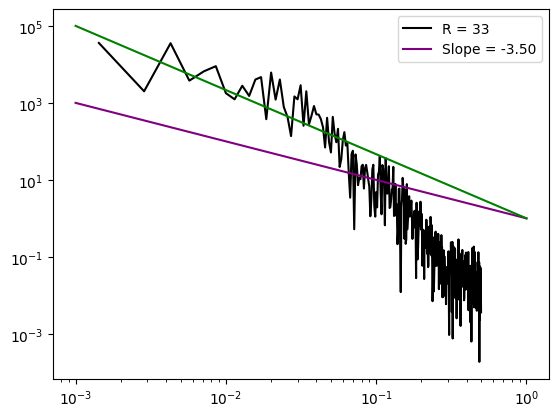

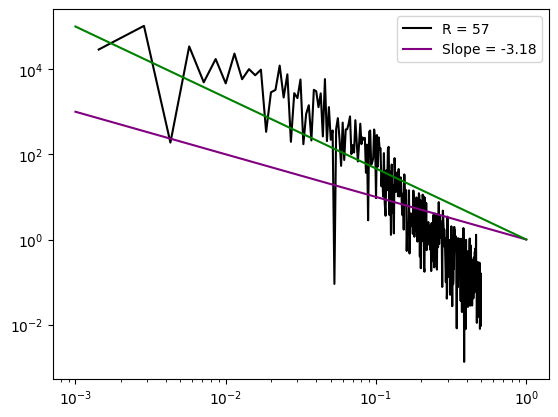

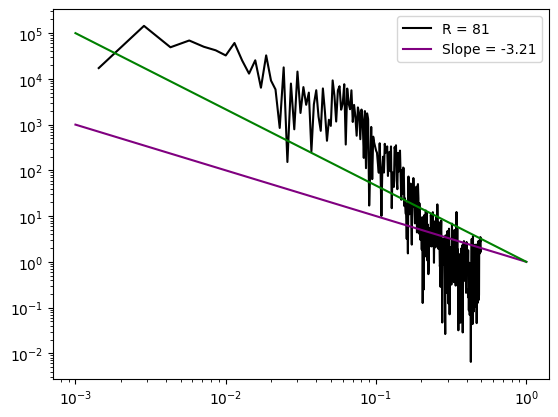

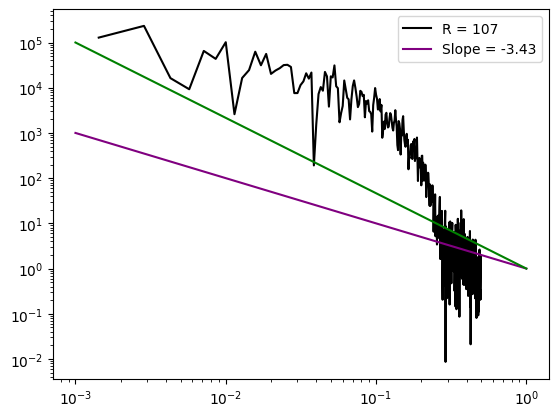

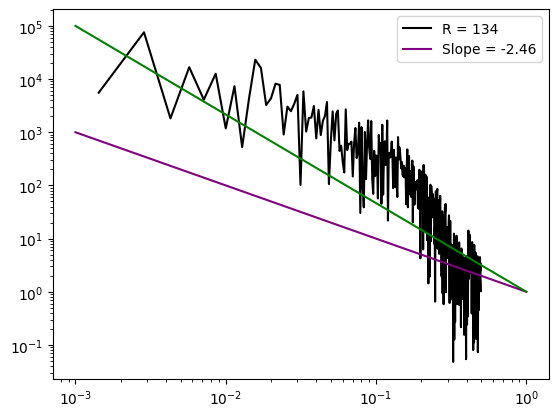

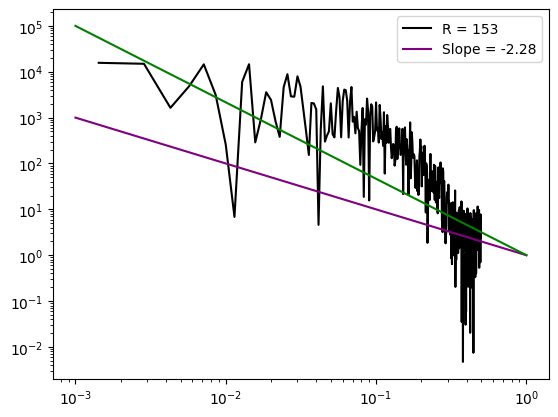

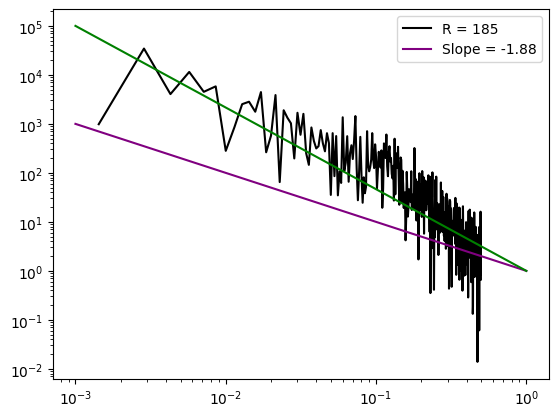

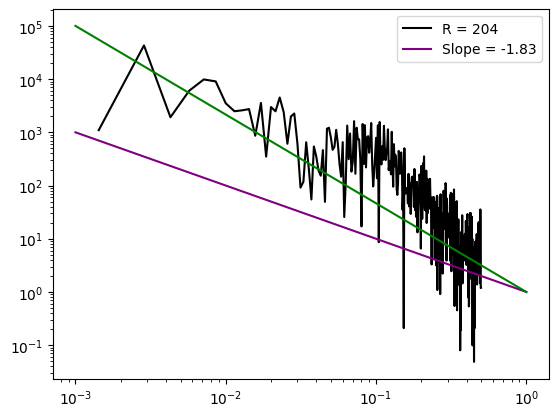

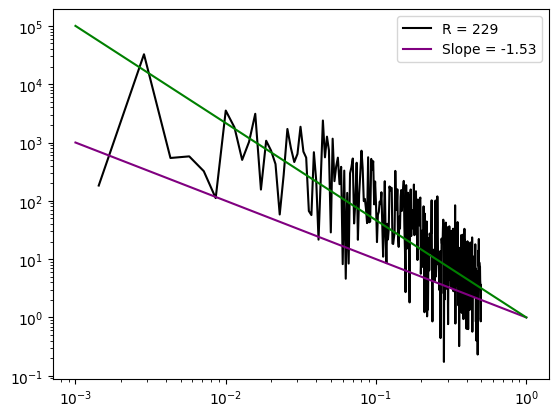

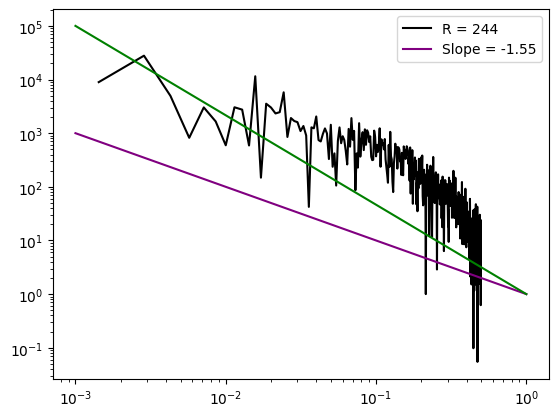

In [60]:


from skimage.draw import disk
from scipy.ndimage import map_coordinates
#from scipy.signal import find_peaks

# Given data
center_x = 926.5
center_y = 522.6
radii = [33, 57, 81, 107, 134, 153, 185, 204, 229, 244]

import matplotlib.pyplot as plt
import numpy as np



# Loop through each radius
for radius in radii:
   ## Generate coordinates along a circle with the given radius around the center
    theta = np.linspace(0, 2 * np.pi, 700)
    x_coords = center_x + radius * np.cos(theta)
    y_coords = center_y + radius * np.sin(theta)

    # Extract intensity values using map_coordinates
    azimuthal_values = map_coordinates(img, [y_coords, x_coords], order=1)
    
    # Perform 1D FFT on azimuthal intensity profile
    fft_result = np.fft.fft(azimuthal_values)

    # Calculate the power spectrum
    power_spectrum = np.abs(fft_result)**2

    # Frequency values corresponding to FFT result
    frequency = np.fft.fftfreq(len(azimuthal_values))

    pos_freq_mask = frequency > 0
    pos_freq = frequency[pos_freq_mask]
    pos_fft = fft_result[pos_freq_mask]

    plt.figure()


    plt.plot(pos_freq, np.abs(pos_fft)**2, 'black', label=f'R = {radius}')
    

    freq_values = np.linspace(0.001, 1, 100)  # Define frequency values for the lines
    plt.loglog(freq_values, freq_values**(-1), 'purple'#, label='Slope = -1'
               )
    plt.loglog(freq_values, freq_values**(-5/3), 'g'#, label='Slope = -5/3'
               )


    log_freq = np.log(pos_freq)
    log_power = np.log(np.abs(pos_fft)**2)
    slope, intercept = np.polyfit(log_freq, log_power, 1)

    legend_labels = [f'R = {radius}', f'Slope = {slope:.2f}']
    # plt.xlabel('Spatial Frequency (Inverse Parsecs)')
    # plt.ylabel('Log Power (Relative Scale)')
    #plt.title(f'FFT Power Spectrum for Radius: {radius}')

    plt.legend(legend_labels)

plt.show()


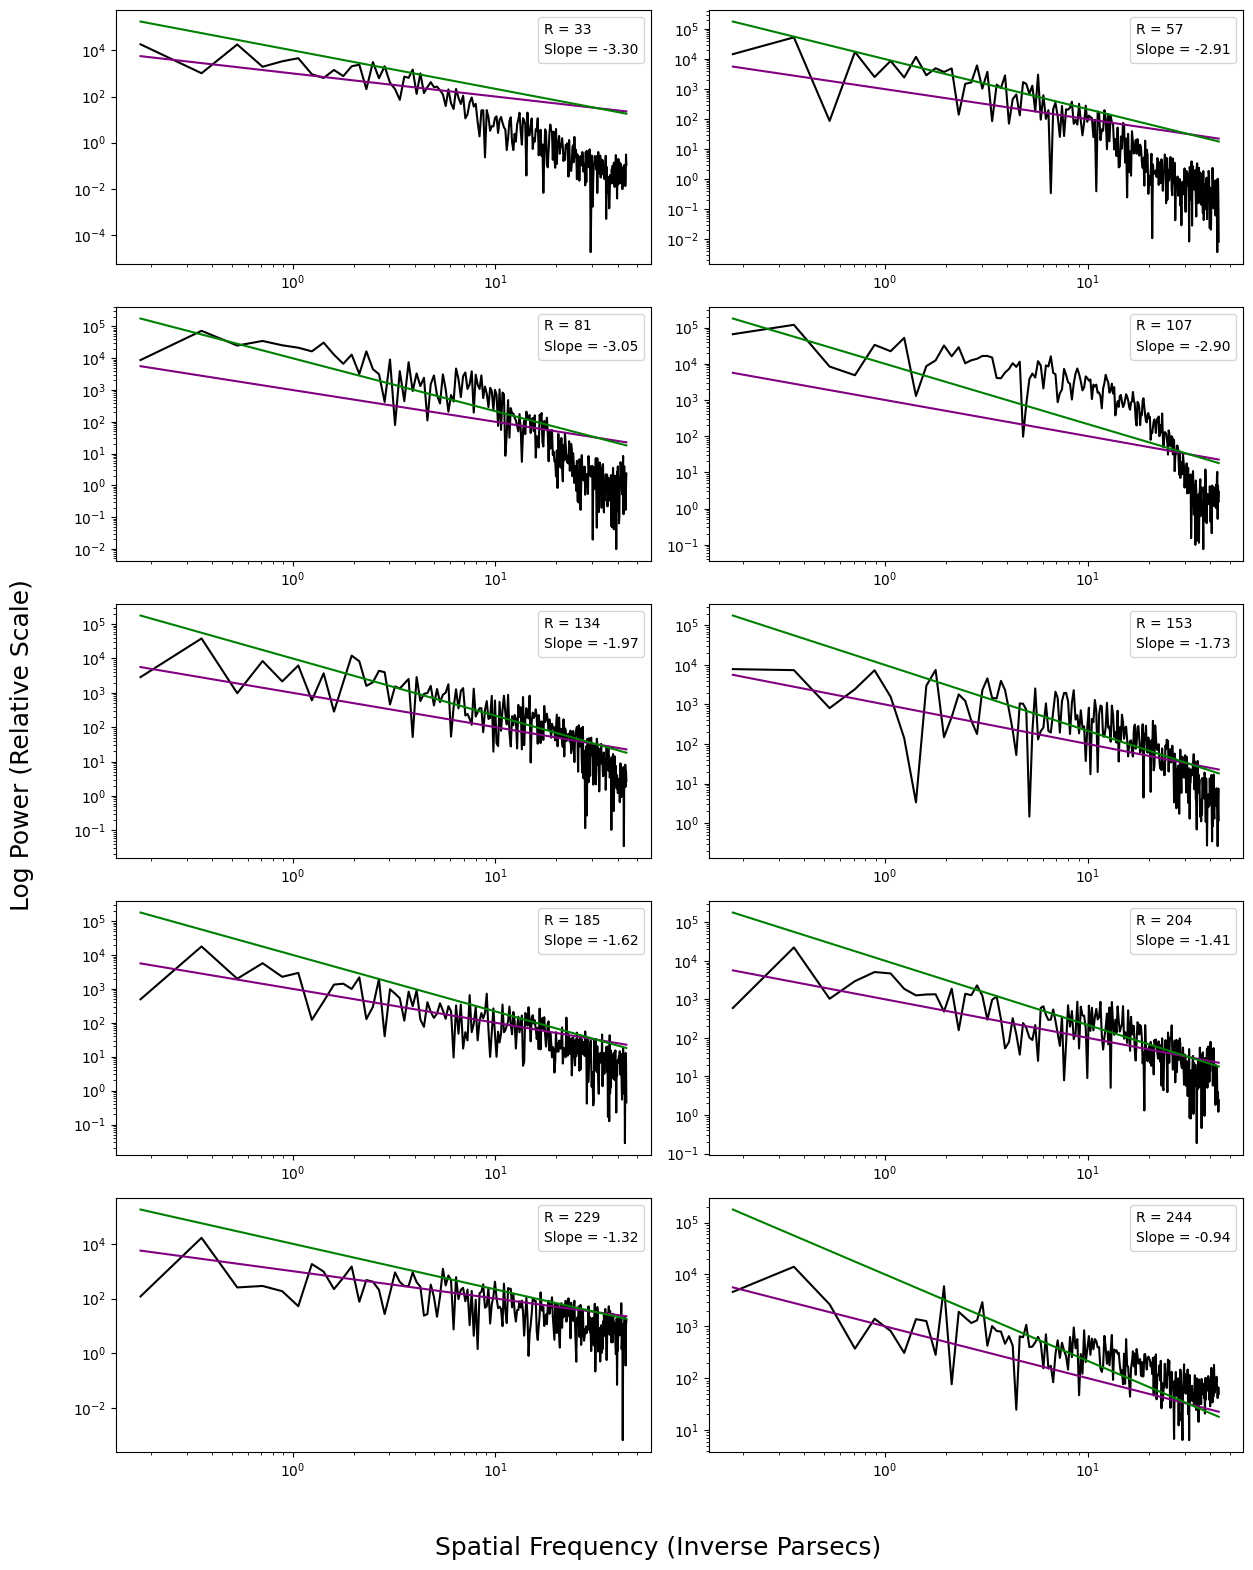

In [15]:
## FFT grid

fig, axs = plt.subplots(5, 2, figsize=(12, 15))  
axs = axs.ravel()  

distance_to_galaxy_mpc = 9.77  # Distance to the galaxy in mpc
pixels_per_arcsecond = 9.09  # Pixels per arcsecond
center_x = 926.5
center_y = 522.6
radii = [33, 57, 81, 107, 134, 153, 185, 204, 229, 244]
#ang_diam = 

# Calculate the conversion factor from inverse pixels to parsecs
inverse_pixels_to_parsecs = pixels_per_arcsecond * distance_to_galaxy_mpc
#length = ang_diam*distance_to_galaxy_mpc



for i, radius in enumerate(sorted(radii)):
    #circular coords with 700 samples
    theta = np.linspace(0, 2 * np.pi, 500)
    x_coords = center_x + radius * np.cos(theta)
    y_coords = center_y + radius * np.sin(theta)
    azimuthal_values = map_coordinates(img, [y_coords, x_coords], order=1)
    
    #do FFT
    fft_result = np.fft.fft(azimuthal_values)
    power_spectrum = np.abs(fft_result)**2
    frequency = np.fft.fftfreq(len(azimuthal_values))

    #only positive frequencies
    pos_freq_mask = frequency > 0
    pos_freq = frequency[pos_freq_mask]
    pos_fft = fft_result[pos_freq_mask]

    #plt.figure()

    spatial_freq_inverseparsecs = pos_freq * inverse_pixels_to_parsecs
    
    #plt.figure()

    #grid setup
    #axs[i].plot(pos_freq, np.abs(pos_fft)**2, 'black', label=f'R = {radius}')
    axs[i].loglog(spatial_freq_inverseparsecs, np.abs(pos_fft)**2, 'black', label=f'R = {radius}')
    # axs[i].loglog(freq_values, freq_values**(-1), 'purple')
    # axs[i].loglog(freq_values, freq_values**(-5/3), 'g')
    axs[i].loglog(spatial_freq_inverseparsecs, spatial_freq_inverseparsecs**(-1)*1e3, 'purple')
    axs[i].loglog(spatial_freq_inverseparsecs, spatial_freq_inverseparsecs**(-5/3)*1e4, 'g')

    #best fit
    log_freq = np.log(spatial_freq_inverseparsecs)
    log_power = np.log(np.abs(pos_fft)**2)
    slope, intercept = np.polyfit(log_freq, log_power, 1)

    legend_labels = [f'R = {radius}', f'Slope = {slope:.2f}'] #display best fit 
    axs[i].legend(legend_labels, handlelength=0, handletextpad=0)

fig.text(0.5, -0.04, 'Spatial Frequency (Inverse Parsecs)', ha='center', fontsize = 18)
fig.text(-0.04, 0.5, 'Log Power (Relative Scale)', va='center', rotation='vertical',fontsize = 18)

plt.tight_layout()
plt.show()

1.7362357428206765
1.0051891142646021
[1.7362357428206765, 1.0051891142646021, 0.7073553026306459, 0.5354745748886198, 0.42758044412748003, 0.3744822190397537, 0.3097069162869315, 0.2808616642798153, 0.2501999105374774, 0.23481876849623903]
[0.3332322187521232, 0.1929239161196503, 0.1357612743064206, 0.10277255344691652, 0.08206465088671691, 0.07187361580928148, 0.059441422804432806, 0.05390521185696112, 0.048020363400961004, 0.045068291880410116]


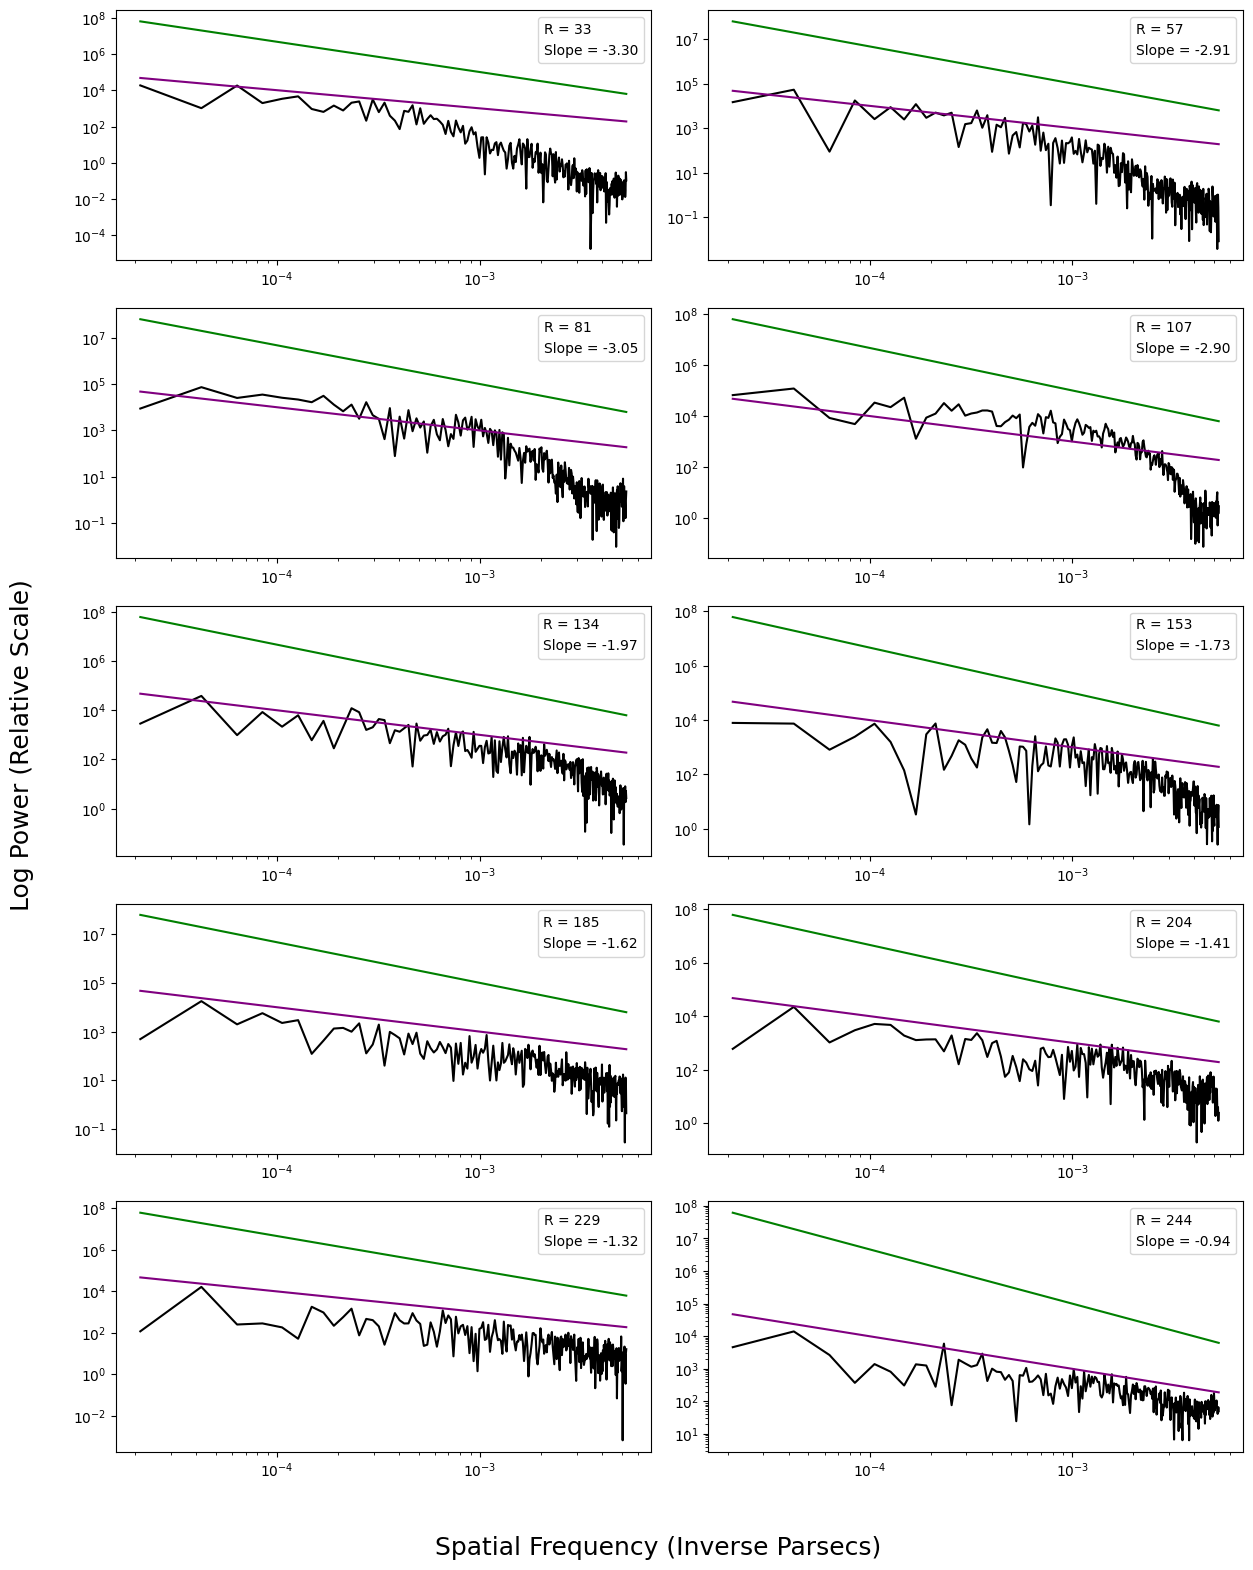

In [18]:
## FFT grid

fig, axs = plt.subplots(5, 2, figsize=(12, 15))  
axs = axs.ravel()  

distance_to_galaxy_pc = 9.77e6  # Distance to the galaxy in pc
pixels_per_arcsecond = 9.09  # Pixels per arcsecond
center_x = 926.5
center_y = 522.6

ex = 360 / (2 * np.pi * 33)
print(ex)
ex2 = 360 / (2 * np.pi * 57)
print(ex2)

# for ax in axs:
#     ax.set_xlim(1e-3, 1e1) 
#     ax.set_ylim(1e-4, 1e6)

## inverse degree to inverse pixels
radii_degrees = [33, 57, 81, 107, 134, 153, 185, 204, 229, 244]

# # Convert radii from inverse degrees to inverse pixels using a for loop
radii_inverse_pixels = []
for radius in radii_degrees:
    #radii_inverse_pixels = []
    inv_degree_to_inv_pixels = 360 / (2 * np.pi * radius)
    #converted_radius = inv_degree_to_inv_pixels * radius
    radii_inverse_pixels.append(inv_degree_to_inv_pixels)

# Display the converted radii in inverse pixels
print(radii_inverse_pixels)

# Convert radii from inverse pixels to inverse parsecs
radii_inverse_parsecs = []
for radius in radii_inverse_pixels:
    #radii_inverse_pixels = []
    inv_pixels_to_inv_parsecs = radius*(1/0.11)*(206265/1)*(1/distance_to_galaxy_pc)
    #converted_radius = inv_degree_to_inv_pixels * radius
    radii_inverse_parsecs.append(inv_pixels_to_inv_parsecs)

# Display the converted radii in inverse pixels
print(radii_inverse_parsecs)


# Calculate spatial frequencies in inverse parsecs (consistently for all plots)
spatial_freq_inverseparsecs = []

for radius in radii_degrees:
    # Convert azimuthal frequencies from inverse degrees to inverse pixels
    spatial_freq_inversepixels = pos_freq * radii_inverse_pixels[i]
    
    # Then perform the conversion to inverse parsecs
    spatial_freq_inverseparsecs.append(spatial_freq_inversepixels * radii_inverse_parsecs[i])


for i, radius in enumerate(sorted(radii_degrees)):
    #circular coords with 500 samples
    theta = np.linspace(0, 2 * np.pi, 500)
    x_coords = center_x + radius * np.cos(theta)
    y_coords = center_y + radius * np.sin(theta)
    azimuthal_values = map_coordinates(img, [y_coords, x_coords], order=1)
    
    # Convert azimuthal frequencies from inverse degrees to inverse pixels
    #spatial_freq_inversepixels = pos_freq * radii_inverse_pixels[i]
    
    # Then perform the conversion to inverse parsecs
    #spatial_freq_inverseparsecs = spatial_freq_inversepixels * radii_inverse_parsecs[i]
    
    #do FFT
    fft_result = np.fft.fft(azimuthal_values)
    power_spectrum = np.abs(fft_result)**2
    frequency = np.fft.fftfreq(len(azimuthal_values))

    #only positive frequencies
    pos_freq_mask = frequency > 0
    pos_freq = frequency[pos_freq_mask]
    pos_fft = fft_result[pos_freq_mask]

    axs[i].loglog(spatial_freq_inverseparsecs[i], np.abs(pos_fft)**2, 'black', label=f'R = {radius}')
    axs[i].loglog(spatial_freq_inverseparsecs[i], spatial_freq_inverseparsecs[i]**(-1), 'purple')
    axs[i].loglog(spatial_freq_inverseparsecs[i], spatial_freq_inverseparsecs[i]**(-5/3), 'g')

    #axs[i].set_ylim([10e-5, 10e5])
    #best fit
    log_freq = np.log(spatial_freq_inverseparsecs[i])
    log_power = np.log(np.abs(pos_fft)**2)
    slope, intercept = np.polyfit(log_freq, log_power, 1)

    legend_labels = [f'R = {radius}', f'Slope = {slope:.2f}'] #display best fit 
    axs[i].legend(legend_labels, handlelength=0, handletextpad=0)

fig.text(0.5, -0.04, 'Spatial Frequency (Inverse Parsecs)', ha='center', fontsize = 18)
fig.text(-0.04, 0.5, 'Log Power (Relative Scale)', va='center', rotation='vertical',fontsize = 18)

plt.tight_layout()
plt.show()

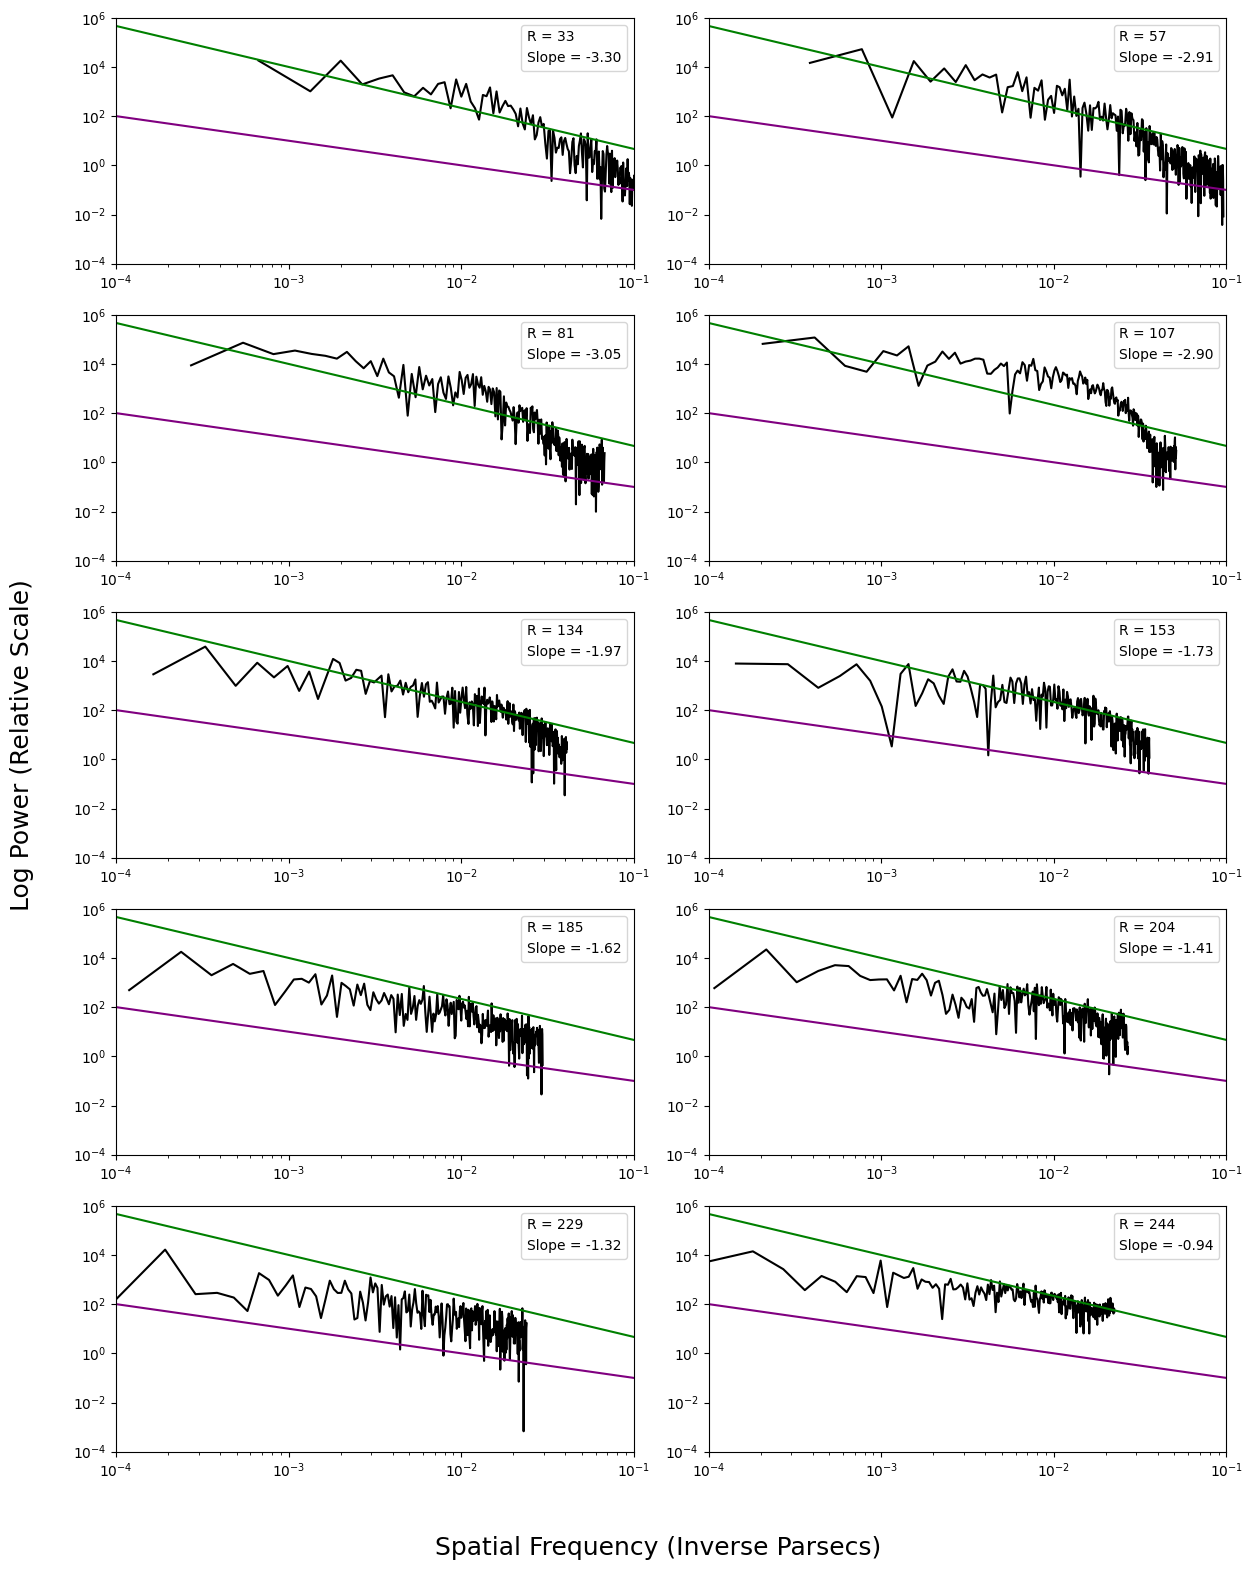

In [47]:
import numpy as np
import matplotlib.pyplot as plt


distance_to_galaxy_pc = 9.77e6  # Distance to the galaxy in pc
center_x = 926.5
center_y = 522.6

radii_degrees = [33, 57, 81, 107, 134, 153, 185, 204, 229, 244]

radii_inverse_pixels = [360 / (2 * np.pi * radius) for radius in radii_degrees]

radii_inverse_parsecs = [
    radius * (1 / 0.11) * (206265 / 1) * (1 / distance_to_galaxy_pc)
    for radius in radii_inverse_pixels
]

spatial_freq_inverseparsecs = [
    pos_freq * radii_inv_parsec for pos_freq, radii_inv_parsec in zip(pos_freq, radii_inverse_parsecs)
]

fig, axs = plt.subplots(5, 2, figsize=(12, 15))
axs = axs.ravel()


for i, radius in enumerate(sorted(radii_degrees)):

    theta = np.linspace(0, 2 * np.pi, 500)
    x_coords = center_x + radius * np.cos(theta)
    y_coords = center_y + radius * np.sin(theta)
    azimuthal_values = map_coordinates(img, [y_coords, x_coords], order=1)

    fft_result = np.fft.fft(azimuthal_values)
    power_spectrum = np.abs(fft_result) ** 2
    frequency = np.fft.fftfreq(len(azimuthal_values))

    pos_freq_mask = frequency > 0
    pos_freq = frequency[pos_freq_mask]
    pos_fft = fft_result[pos_freq_mask]

    x_min_value = 1e-4
    x_max_value = 1e-1
    y_min_value = 1e-4
    y_max_value = 1e6

    axs[i].set_xlim(x_min_value, x_max_value)
    axs[i].set_ylim(y_min_value, y_max_value)

    axs[i].loglog(pos_freq * radii_inverse_parsecs[i], np.abs(pos_fft) ** 2, 'black', label=f'R = {radius}')
    x_range = np.logspace(-4, -1, 100)  # Change the range as needed
    axs[i].loglog(x_range, x_range ** (-1)*1e-2, 'purple')  # Power law with exponent -1
    axs[i].loglog(x_range, x_range ** (-5 / 3)*1e-1, 'g')  # Power law with exponent -5/3
    #axs[i].loglog(pos_freq * radii_inverse_parsecs[i], (pos_freq * radii_inverse_parsecs[i]) ** (-1), 'purple')
    #axs[i].loglog(pos_freq * radii_inverse_parsecs[i], (pos_freq * radii_inverse_parsecs[i]) ** (-5 / 3), 'g')

    # x_min_value = 1e-4
    # x_max_value = 1e-1
    # y_min_value = 1e-4
    # y_max_value = 1e6

    # axs[i].set_xlim(x_min_value, x_max_value)
    # axs[i].set_ylim(y_min_value, y_max_value)

    log_freq = np.log(pos_freq * radii_inverse_parsecs[i])
    log_power = np.log(np.abs(pos_fft) ** 2)
    slope, intercept = np.polyfit(log_freq, log_power, 1)

    legend_labels = [f'R = {radius}', f'Slope = {slope:.2f}']
    axs[i].legend(legend_labels, handlelength=0, handletextpad=0)

fig.text(0.5, -0.04, 'Spatial Frequency (Inverse Parsecs)', ha='center', fontsize=18)
fig.text(-0.04, 0.5, 'Log Power (Relative Scale)', va='center', rotation='vertical', fontsize=18)

plt.tight_layout()
plt.show()


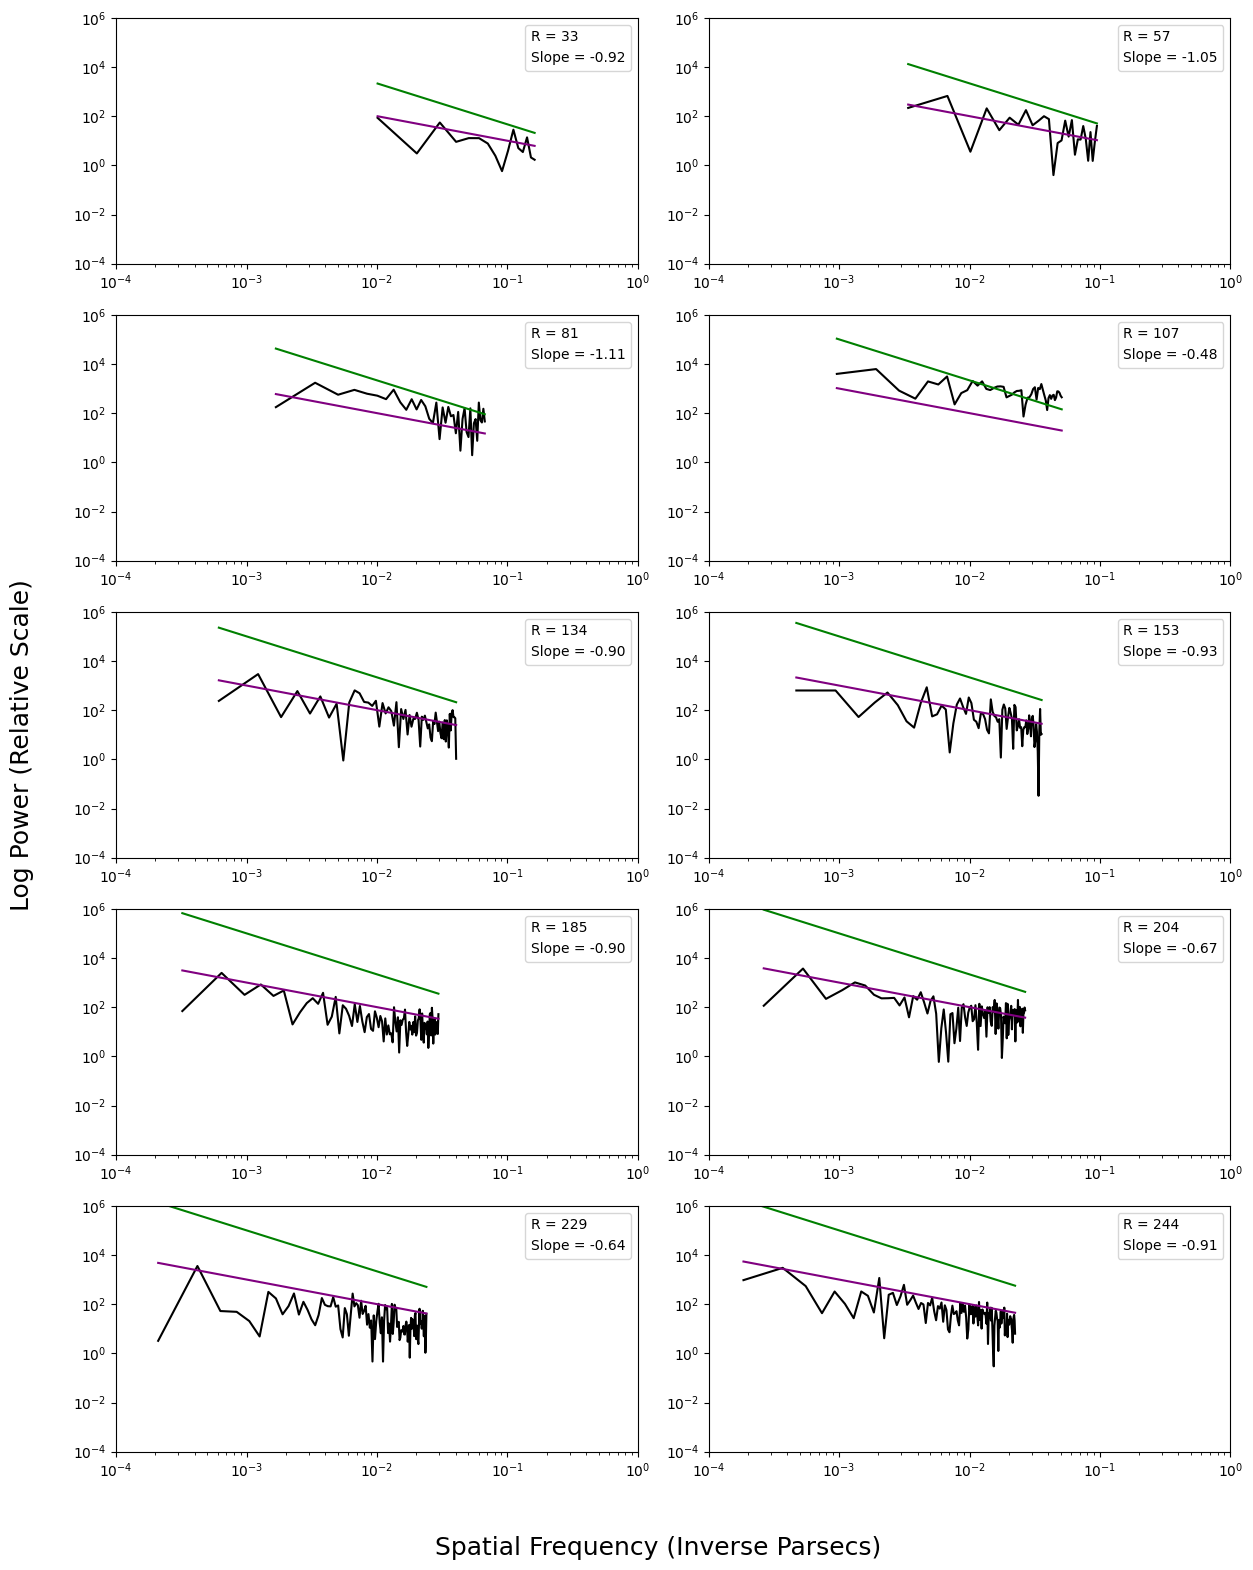

In [29]:
import numpy as np
import matplotlib.pyplot as plt


distance_to_galaxy_pc = 9.77e6  # Distance to the galaxy in pc
center_x = 926.5
center_y = 522.6

radii_degrees = [33, 57, 81, 107, 134, 153, 185, 204, 229, 244]

radii_inverse_pixels = [360 / (2 * np.pi * radius) for radius in radii_degrees]

radii_inverse_parsecs = [
    radius * (1 / 0.11) * (206265 / 1) * (1 / distance_to_galaxy_pc)
    for radius in radii_inverse_pixels
]

spatial_freq_inverseparsecs = [
    pos_freq * radii_inv_parsec for pos_freq, radii_inv_parsec in zip(pos_freq, radii_inverse_parsecs)
]

fig, axs = plt.subplots(5, 2, figsize=(12, 15))
axs = axs.ravel()


for i, radius in enumerate(sorted(radii_degrees)):

    # Calculate indices around the radius (assuming `img` is your image array)
    radius_pixels = int(radius)  # Assuming radius is an integer value
    indices = np.linspace(0, 2 * np.pi, radius_pixels, endpoint=False)
    x_coords = center_x + radius * np.cos(indices)
    y_coords = center_y + radius * np.sin(indices)
    azimuthal_values = map_coordinates(img, [y_coords, x_coords], order=1)


    fft_result = np.fft.fft(azimuthal_values)
    power_spectrum = np.abs(fft_result) ** 2
    frequency = np.fft.fftfreq(len(azimuthal_values))

    pos_freq_mask = frequency > 0
    pos_freq = frequency[pos_freq_mask]
    pos_fft = fft_result[pos_freq_mask]

    axs[i].loglog(pos_freq * radii_inverse_parsecs[i], np.abs(pos_fft) ** 2, 'black', label=f'R = {radius}')
    axs[i].loglog(pos_freq * radii_inverse_parsecs[i], (pos_freq * radii_inverse_parsecs[i]) ** (-1), 'purple')
    axs[i].loglog(pos_freq * radii_inverse_parsecs[i], (pos_freq * radii_inverse_parsecs[i]) ** (-5 / 3), 'g')

    x_min_value = 1e-4
    x_max_value = 1e0
    y_min_value = 1e-4
    y_max_value = 1e6

    axs[i].set_xlim(x_min_value, x_max_value)
    axs[i].set_ylim(y_min_value, y_max_value)

    log_freq = np.log(pos_freq * radii_inverse_parsecs[i])
    log_power = np.log(np.abs(pos_fft) ** 2)
    slope, intercept = np.polyfit(log_freq, log_power, 1)

    legend_labels = [f'R = {radius}', f'Slope = {slope:.2f}']
    axs[i].legend(legend_labels, handlelength=0, handletextpad=0)

fig.text(0.5, -0.04, 'Spatial Frequency (Inverse Parsecs)', ha='center', fontsize=18)
fig.text(-0.04, 0.5, 'Log Power (Relative Scale)', va='center', rotation='vertical', fontsize=18)

plt.tight_layout()
plt.show()
